In [23]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Location = r'Train.csv'
df = pd.read_csv(Location)
Lables =r'Labels.csv'
df_targets = pd.read_csv(Lables)

In [24]:
df_joined = pd.concat([df, df_targets.status_group], axis=1, join_axes=[df.index])

In [25]:
df.shape

(59400, 40)

In [26]:
df_targets.shape

(59400, 2)

In [27]:
df_joined.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [36]:
import dateutil.parser as parser
dat = pd.DataFrame()
year_fromdate = []
month_fromdate = []
for i in range (len(df_joined['date_recorded'])):
    year_fromdate.append( parser.parse(df_joined['date_recorded'].loc[i]).year)
    month_fromdate.append( parser.parse(df_joined['date_recorded'].loc[i]).month)
df_joined['Month_recorded'] = month_fromdate
df_joined['Year_recorded'] = year_fromdate

In [28]:
df_joined.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [29]:
df_joined.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

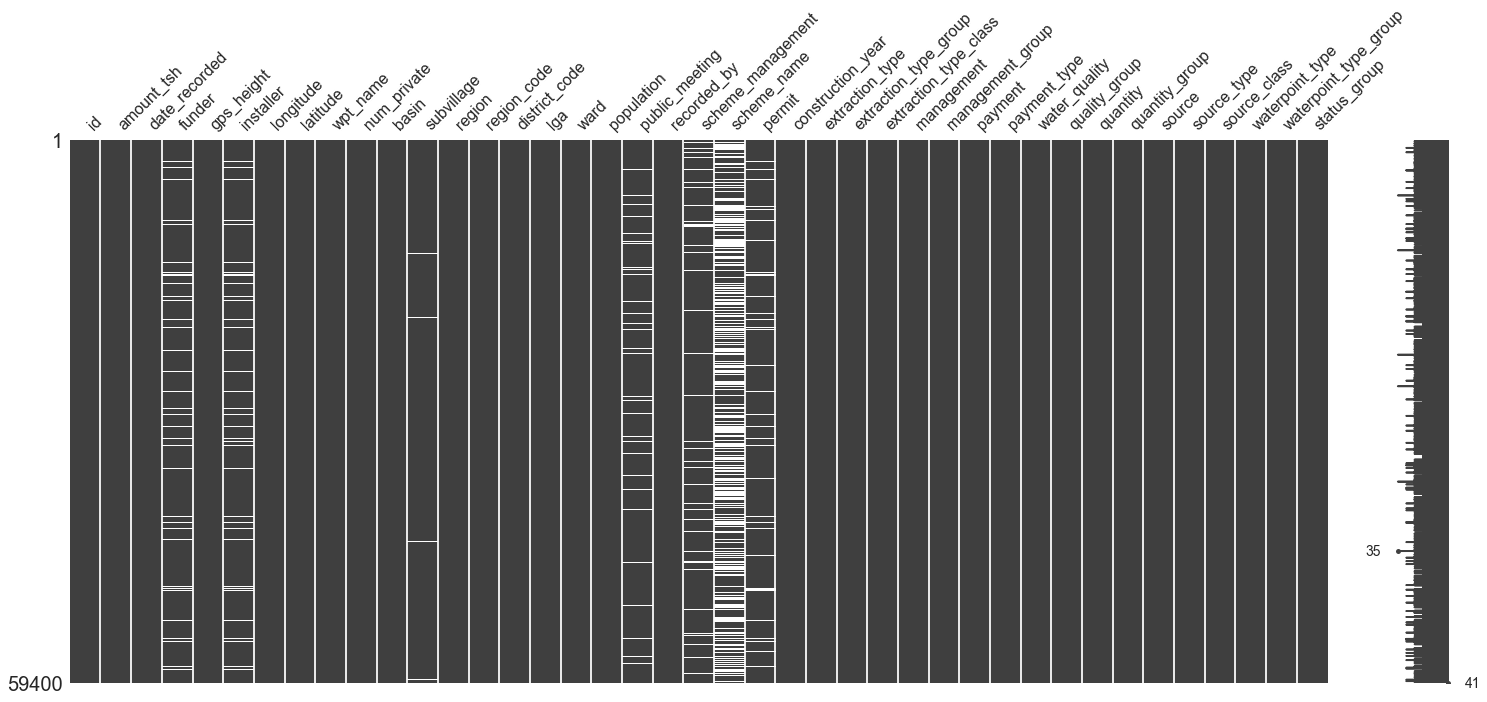

In [30]:
import missingno as msno

msno.matrix(df_joined.sample(59400))

In [22]:
len(df_joined.status_group.unique())

3

In [ ]:
len(df.funder.unique())

In [39]:
df_joined['counts']=1

In [ ]:
df_joined.describe()

In [ ]:
df_agg = df_joined.groupby(['funder','status_group'],as_index=False, sort=False)['counts'].count()

In [ ]:
df_agg.head()

In [ ]:
funder_order=df_agg.sort_values(['funder','counts'], ascending=False)

In [ ]:
funder_order

In [ ]:
funder_order=df_agg.apply(lambda x: x.sort_values(ascending=False))

In [ ]:
funder_order

In [ ]:
df_agg

In [ ]:
g = df_agg['counts'].groupby(level=1, group_keys=True)

In [ ]:
g.head()

In [32]:
colors = ['g', 'y', 'r']

(0, 500)

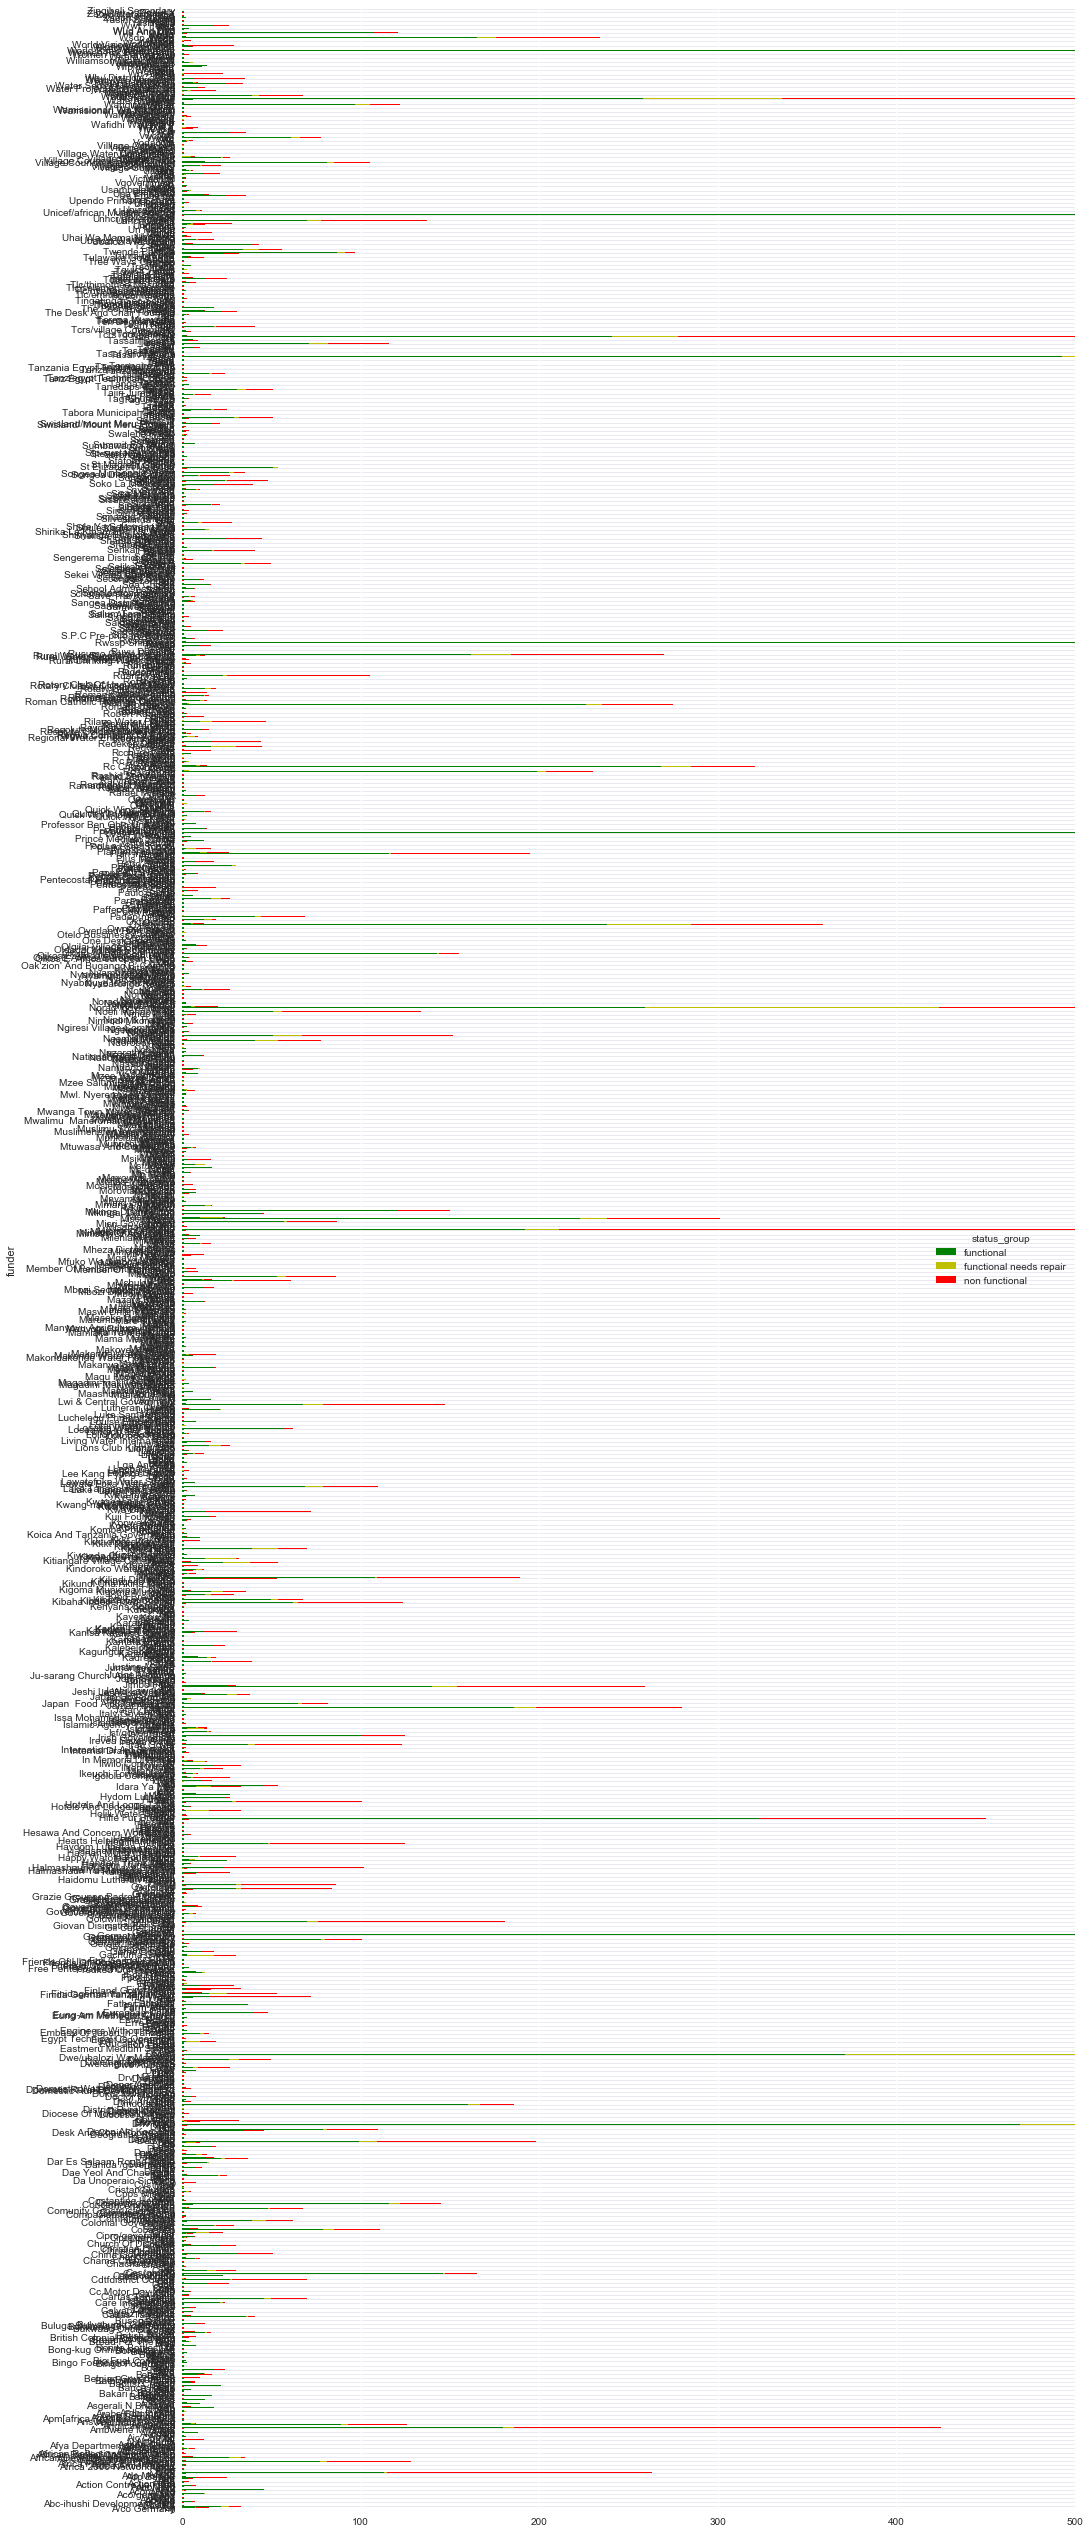

In [33]:
df_joined.groupby(['funder', 'status_group']).size().unstack().plot(kind='barh', stacked=True, color = colors,figsize=(16,46))
plt.xlim(0, 500)

(0, 500)

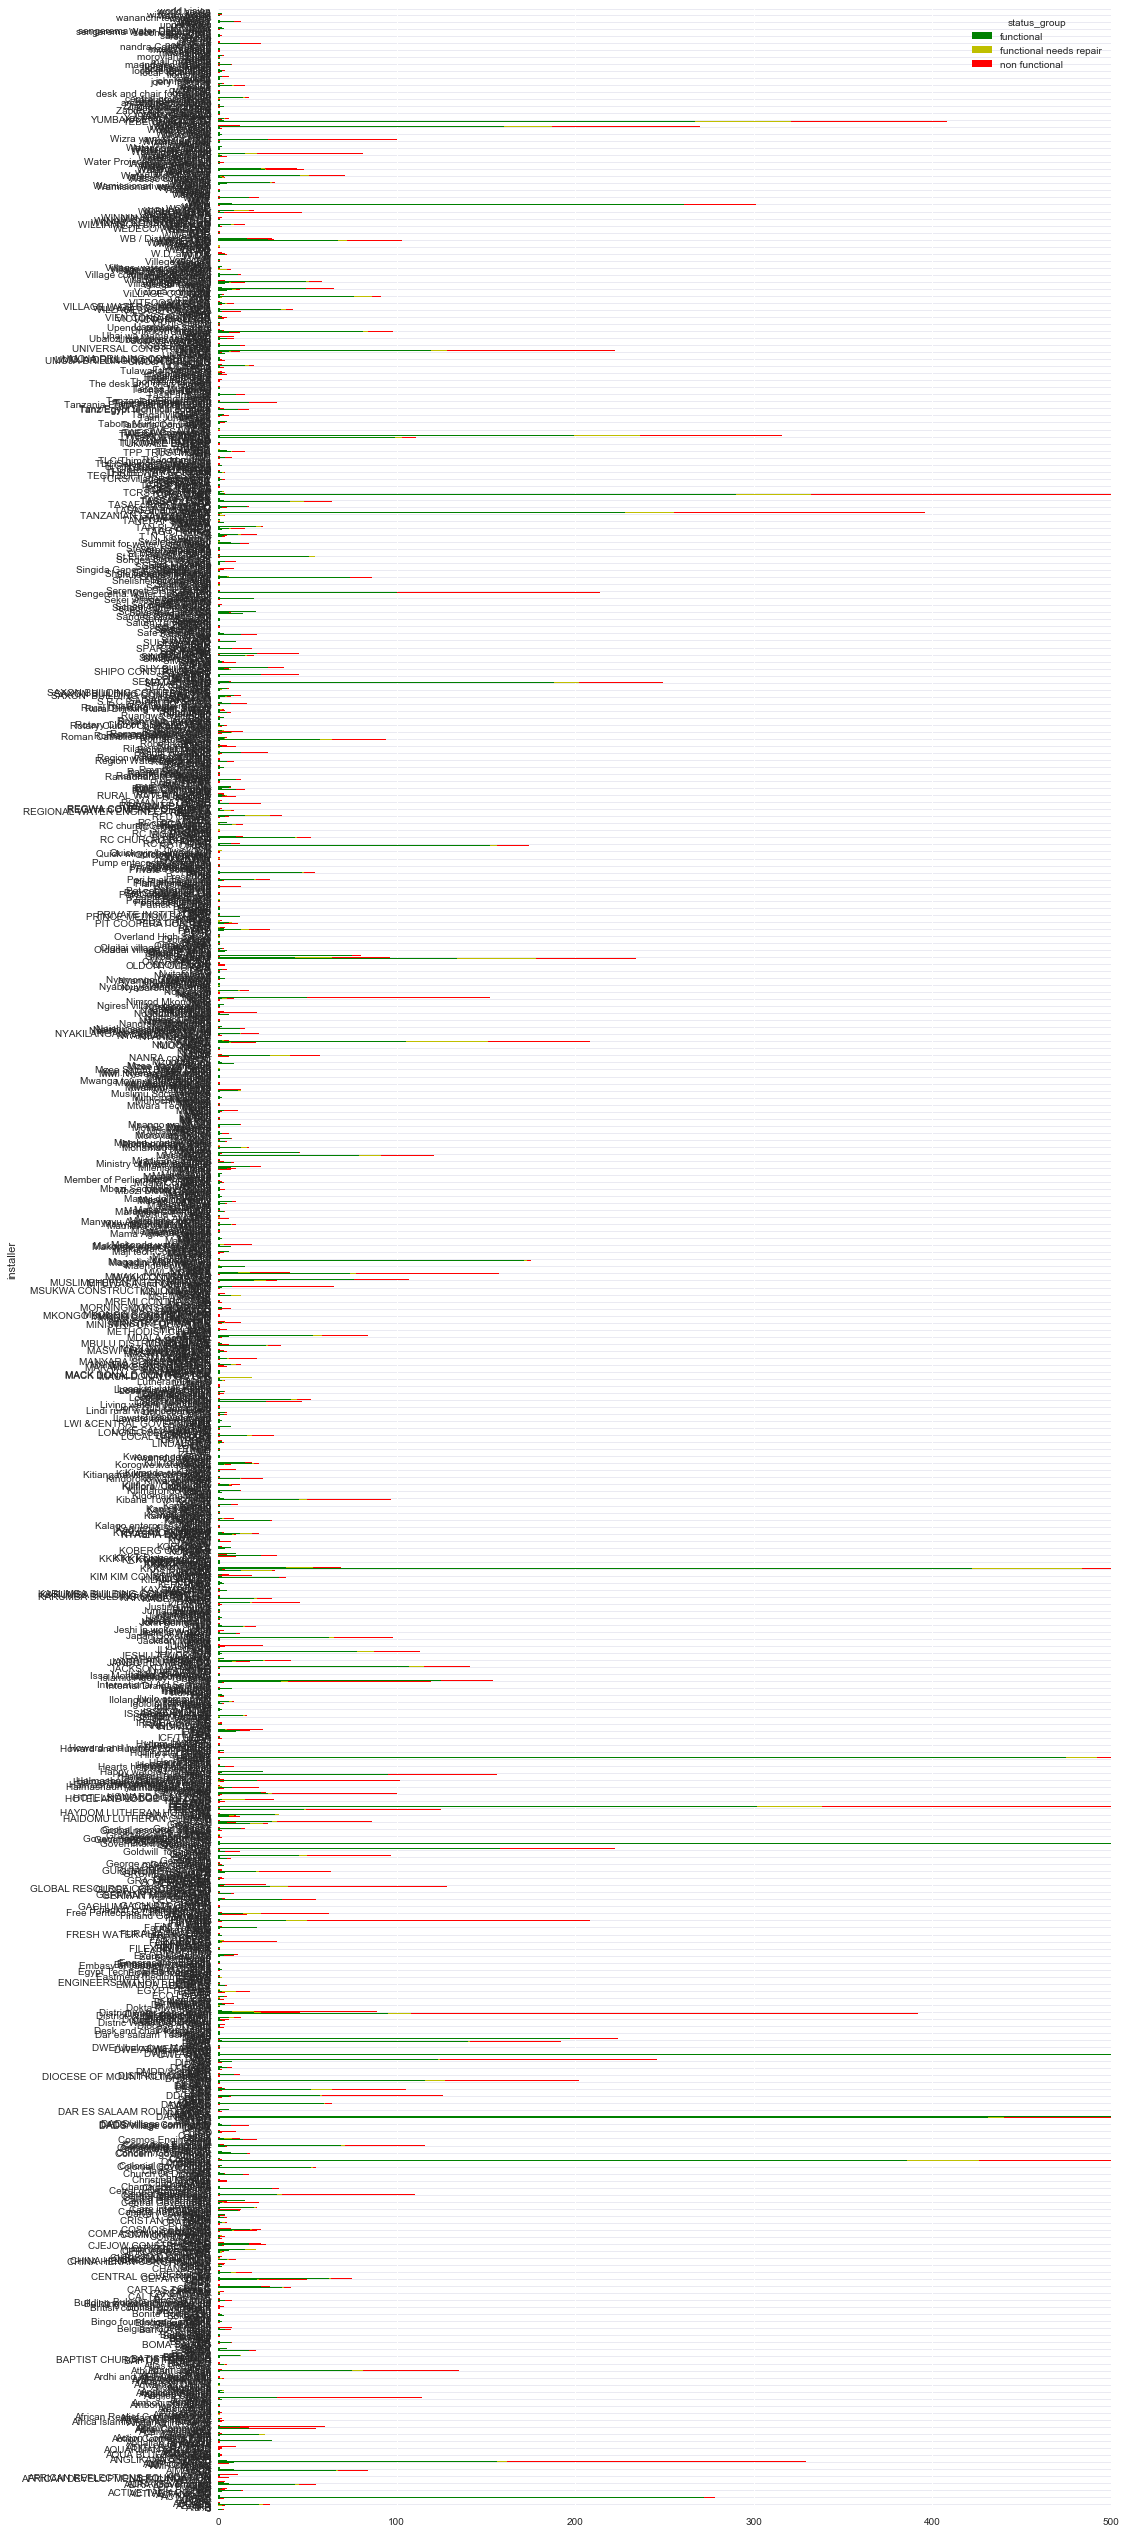

In [34]:
df_joined.groupby(['installer', 'status_group']).size().unstack().plot(kind='barh', stacked=True, color = colors,figsize=(16,46))
plt.xlim(0, 500)

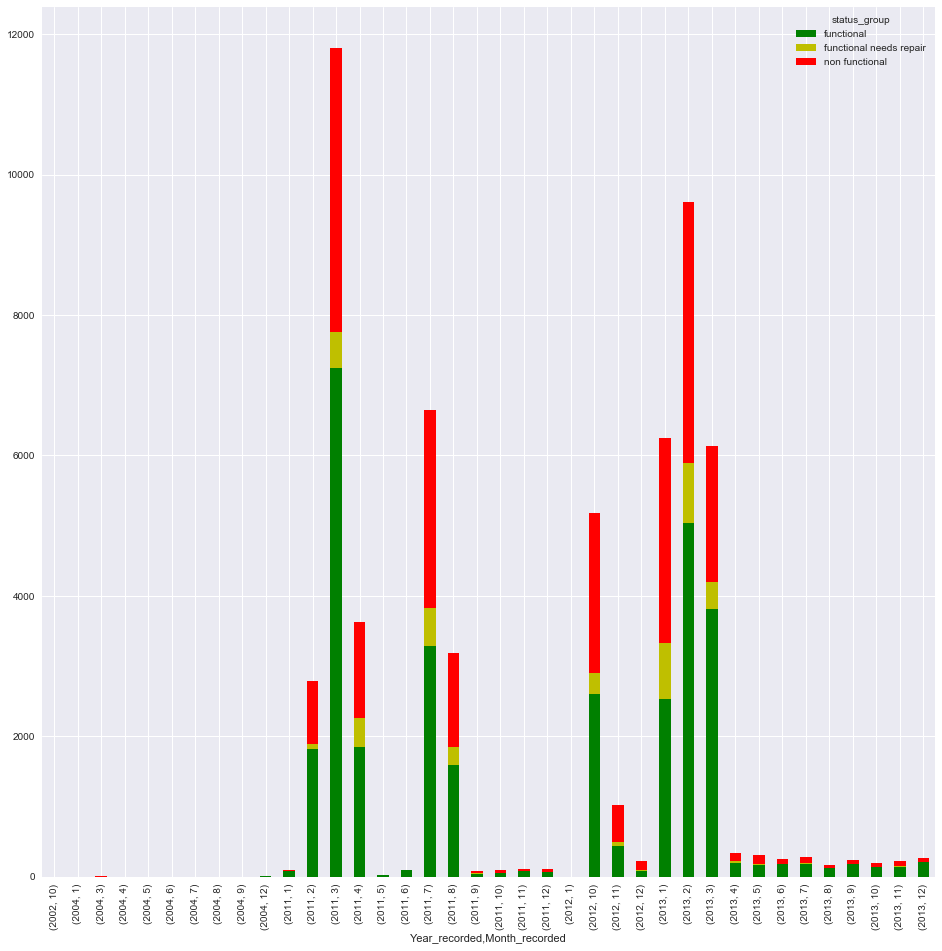

In [37]:
colors = ['g', 'y', 'r']
df_joined.groupby(['Year_recorded', 'Month_recorded','status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors,figsize=(16,16))


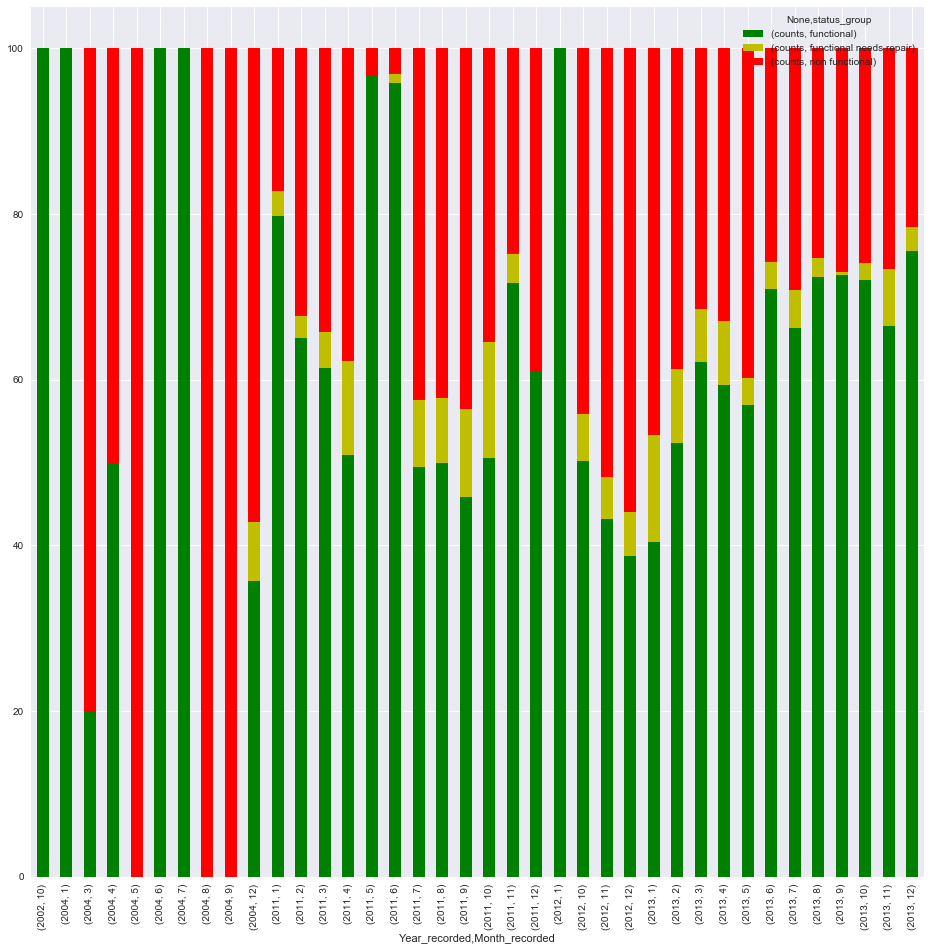

In [40]:
month_year = df_joined.groupby(['Year_recorded', 'Month_recorded','status_group']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(1,0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors,figsize=(16,16))

In [ ]:
colors

(25, 45)

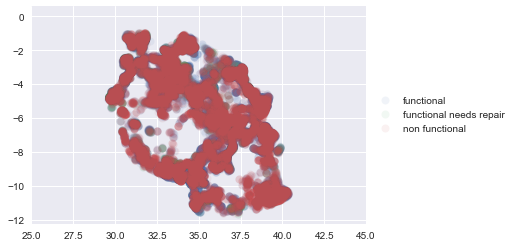

In [41]:
groups = df_joined.groupby('status_group')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=8, alpha=0.08,label=name)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(25, 45)
plt.show()

In [ ]:
k

(25, 45)

(25, 45)

(25, 45)

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


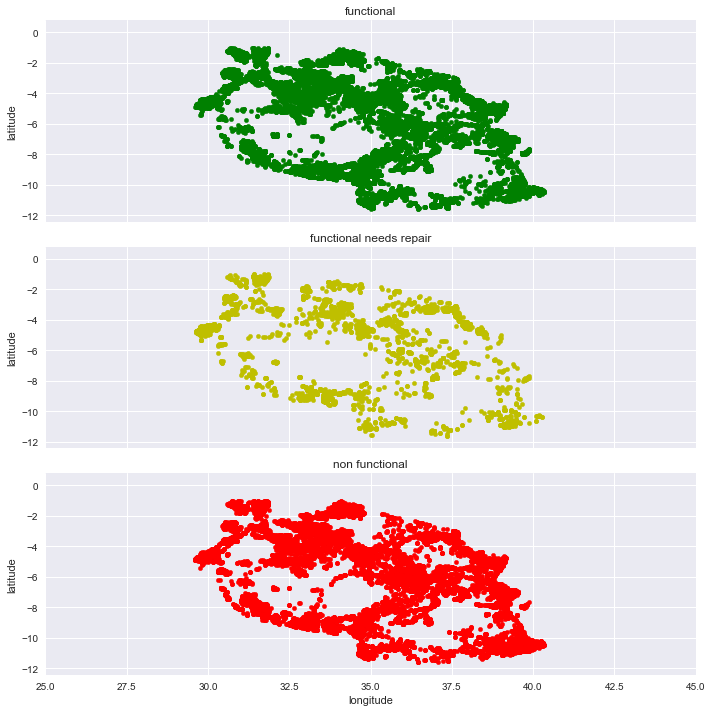

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10,10), squeeze=False)
axes_list = [item for sublist in axes for item in sublist] 
colors = {'functional':'g', 'functional needs repair':'y', 'non functional':'r'}
for k, v in df_joined.groupby('status_group'):
    ax = axes_list.pop(0)
    v.plot(x='longitude', y='latitude', c=colors[k],kind ='scatter', label=k, ax=ax, legend=False)
    plt.xlim(25, 45)
    ax.set_title(k)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()

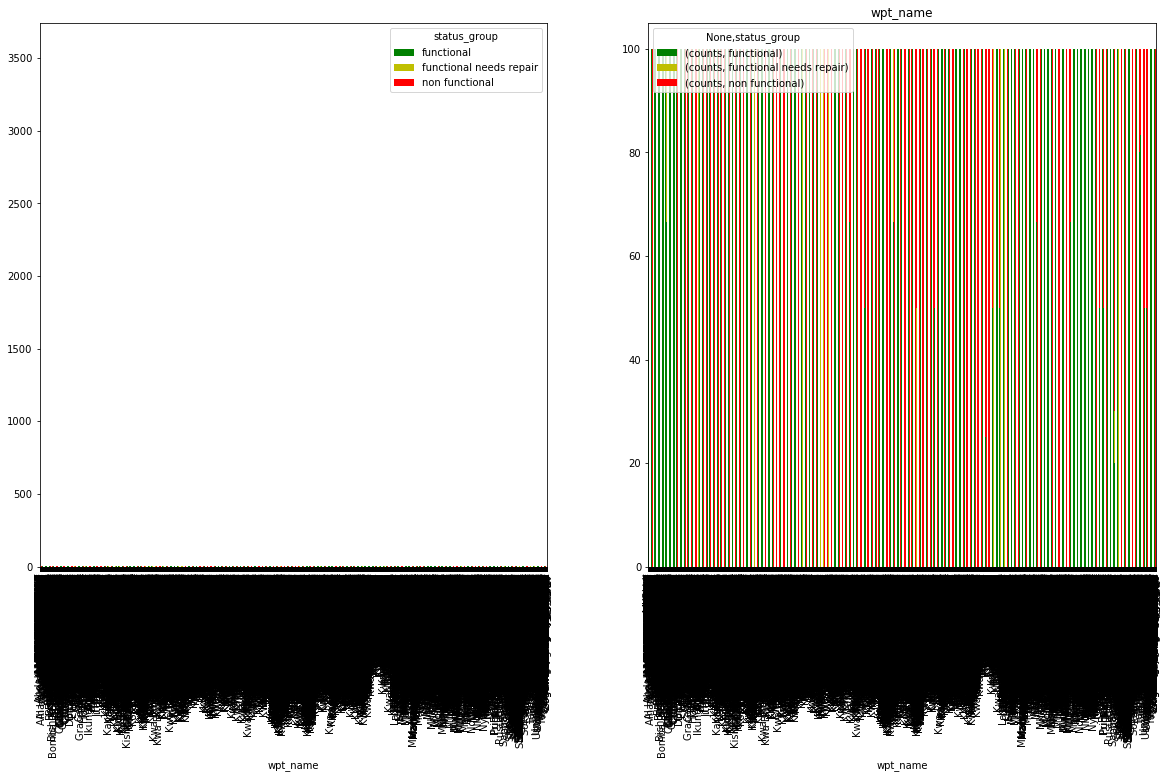

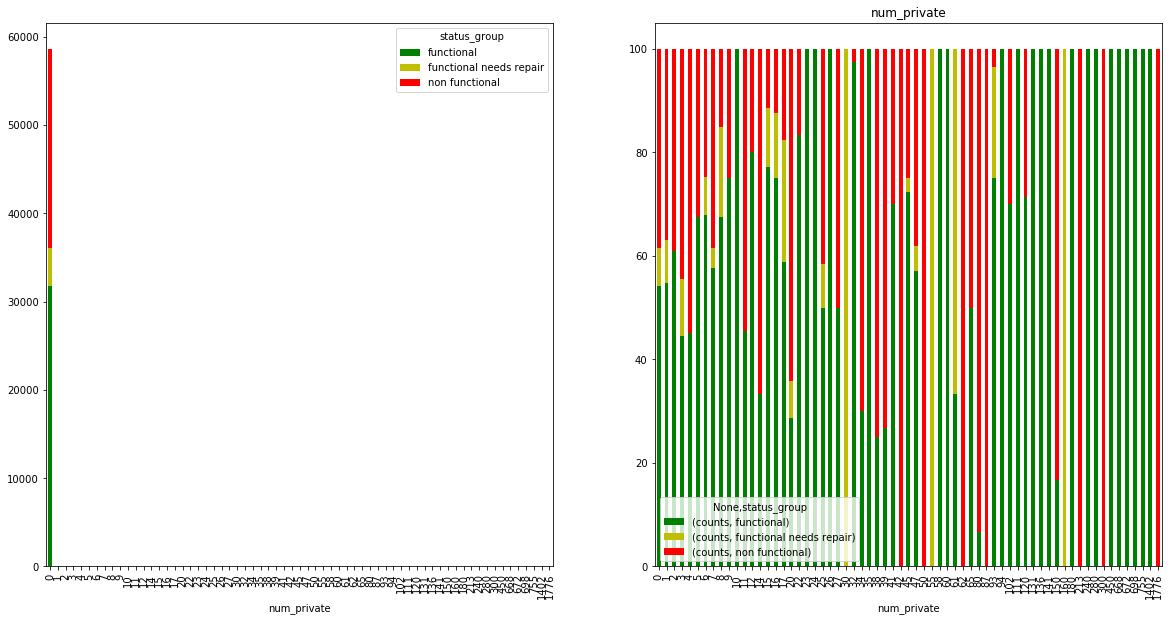

In [14]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(8,10):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

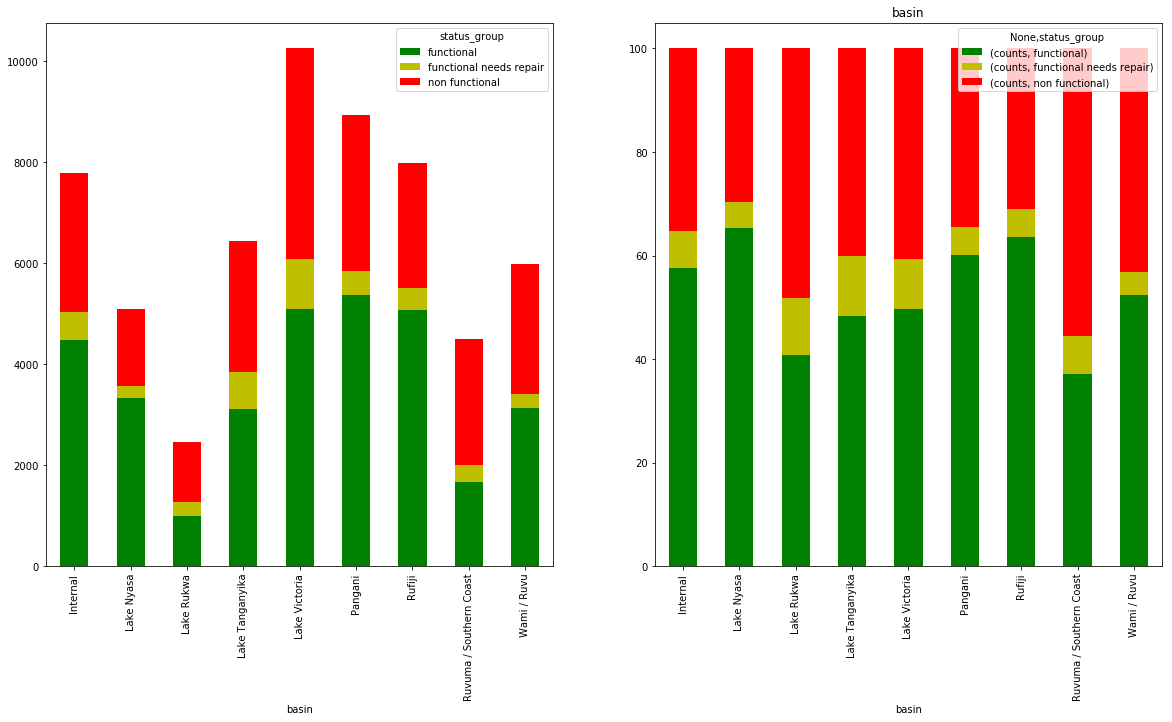

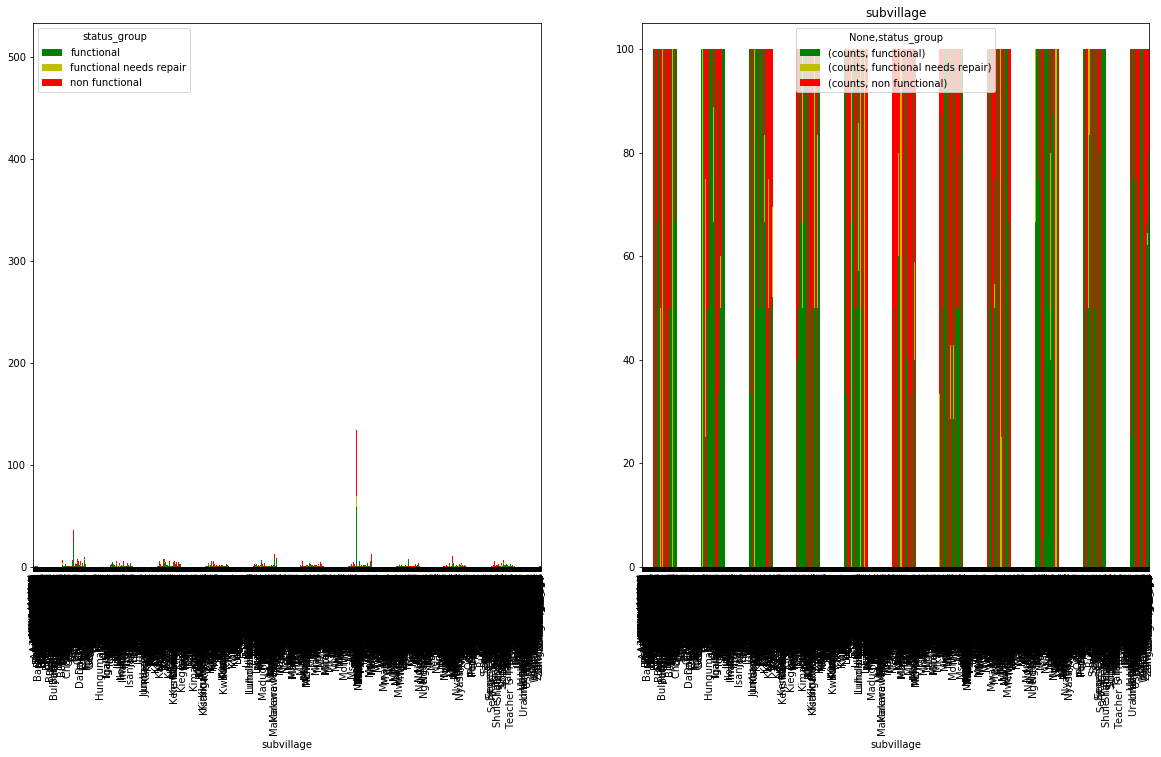

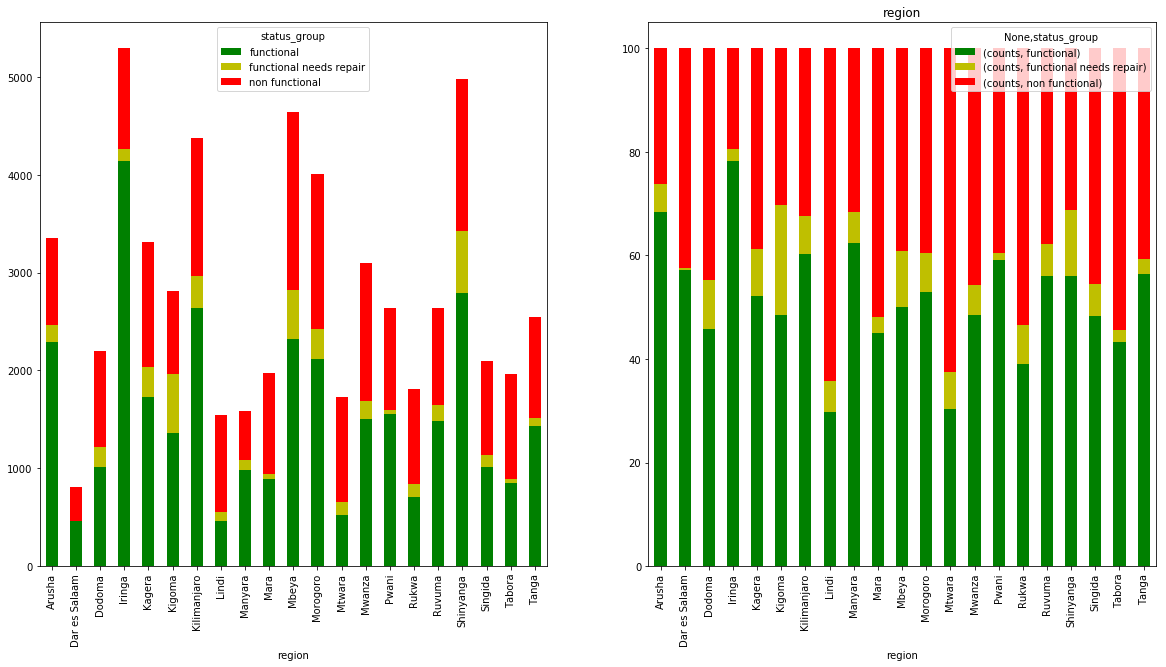

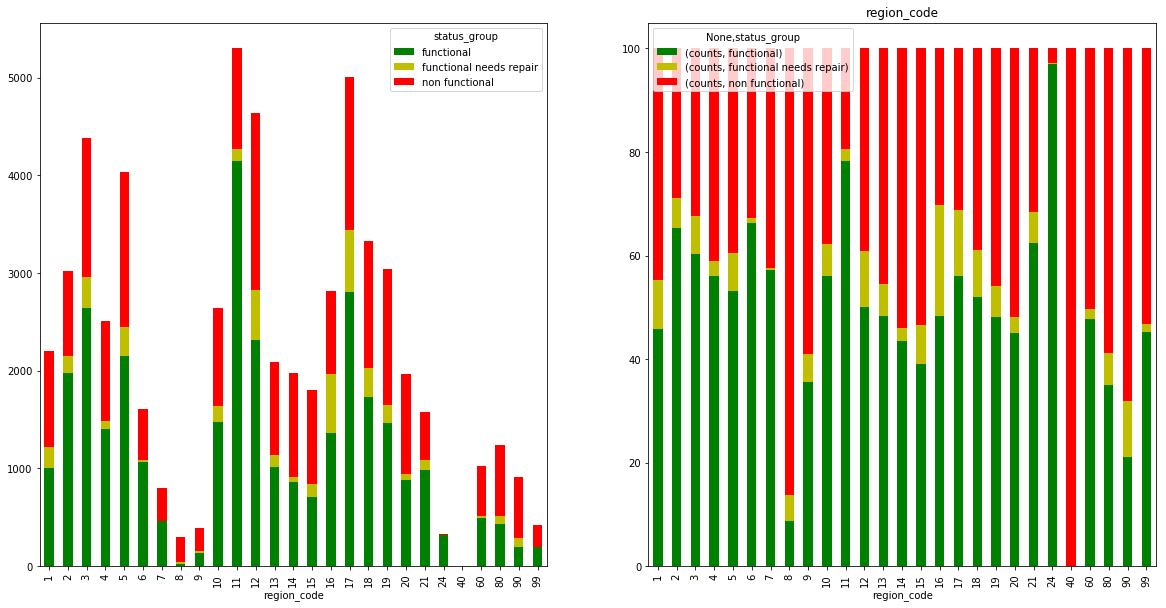

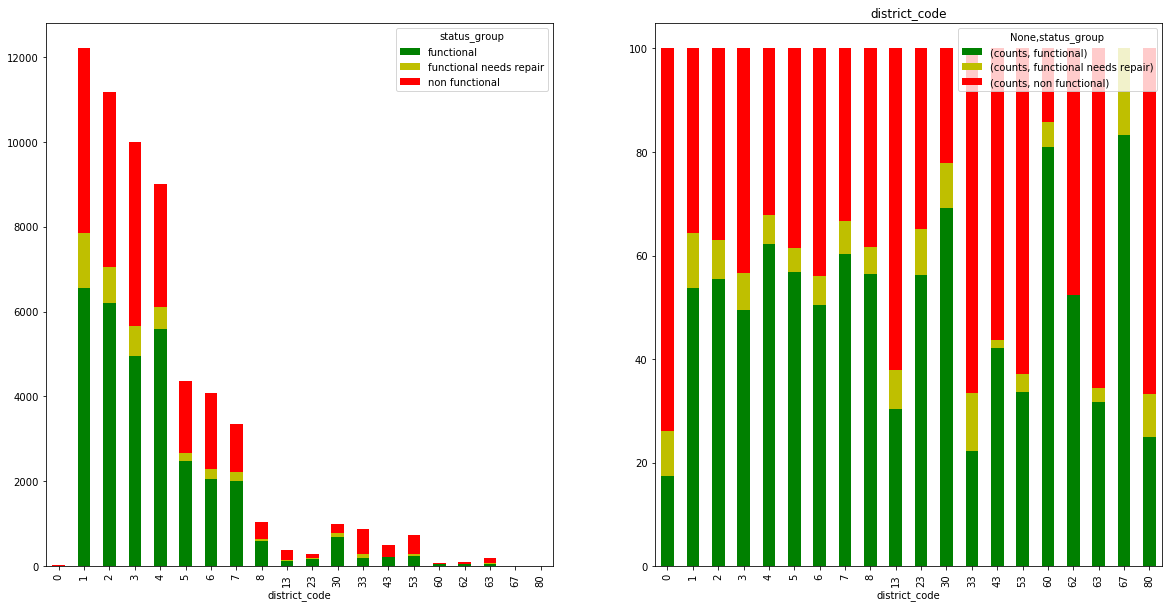

In [15]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(10,15):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

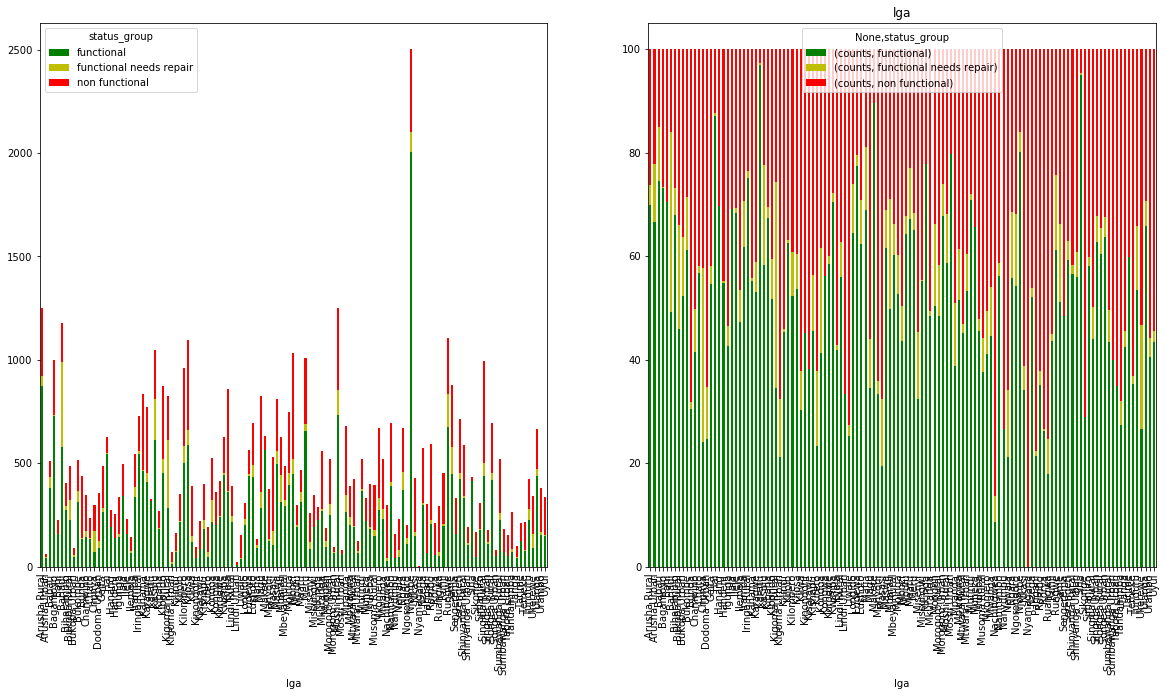

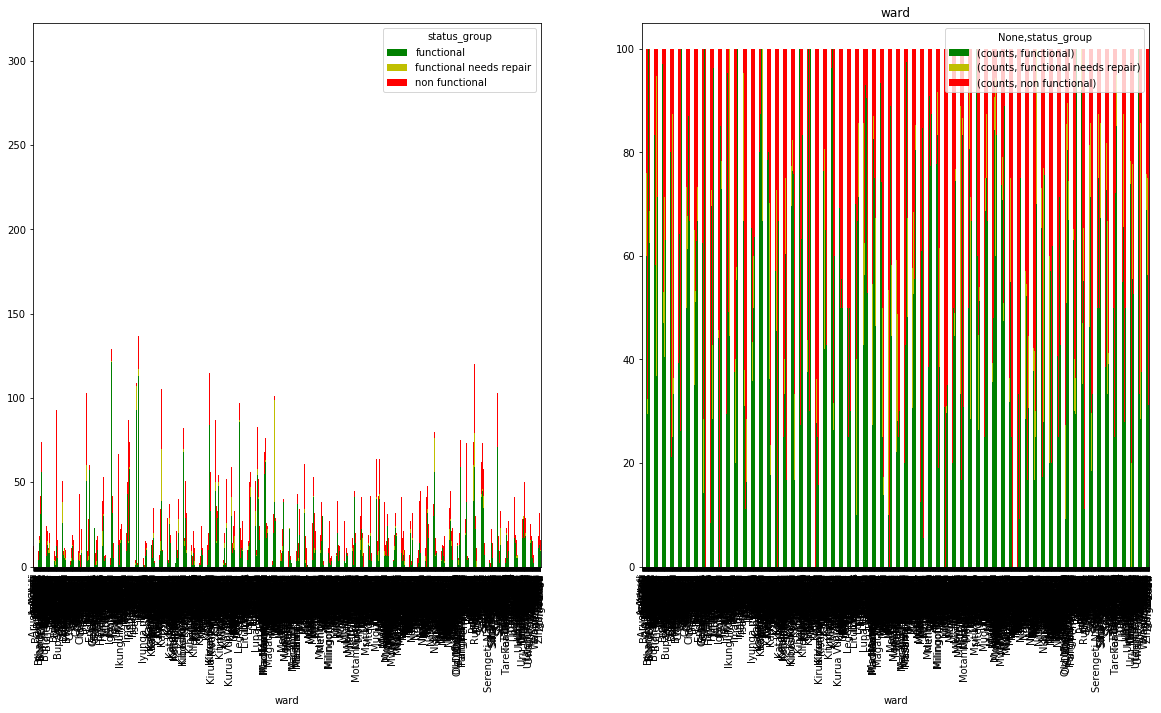

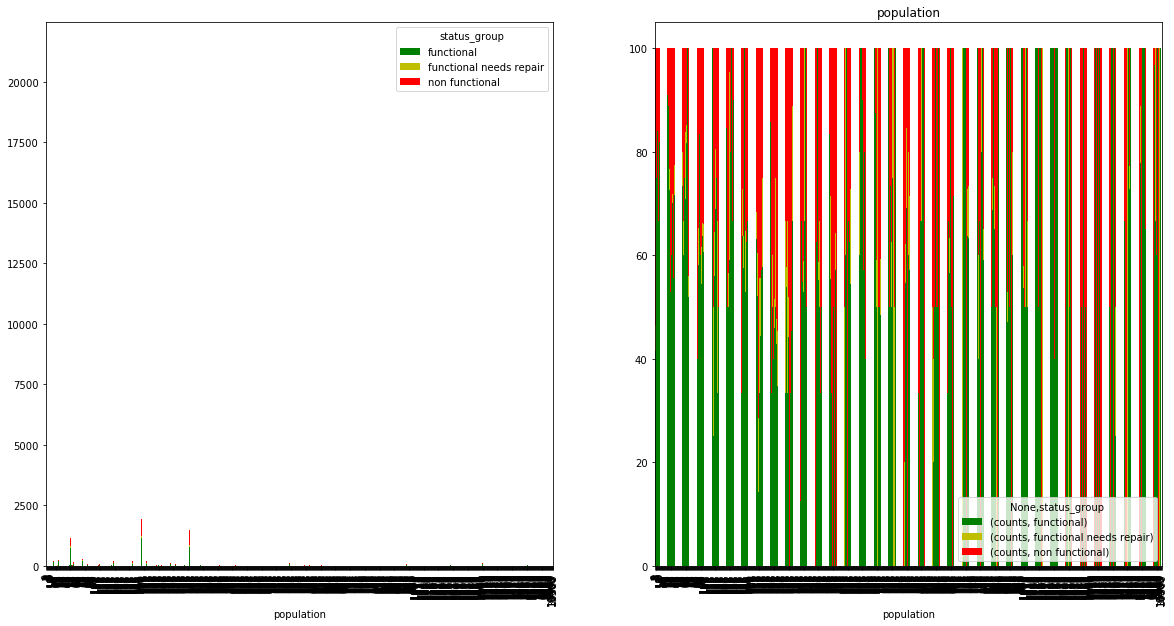

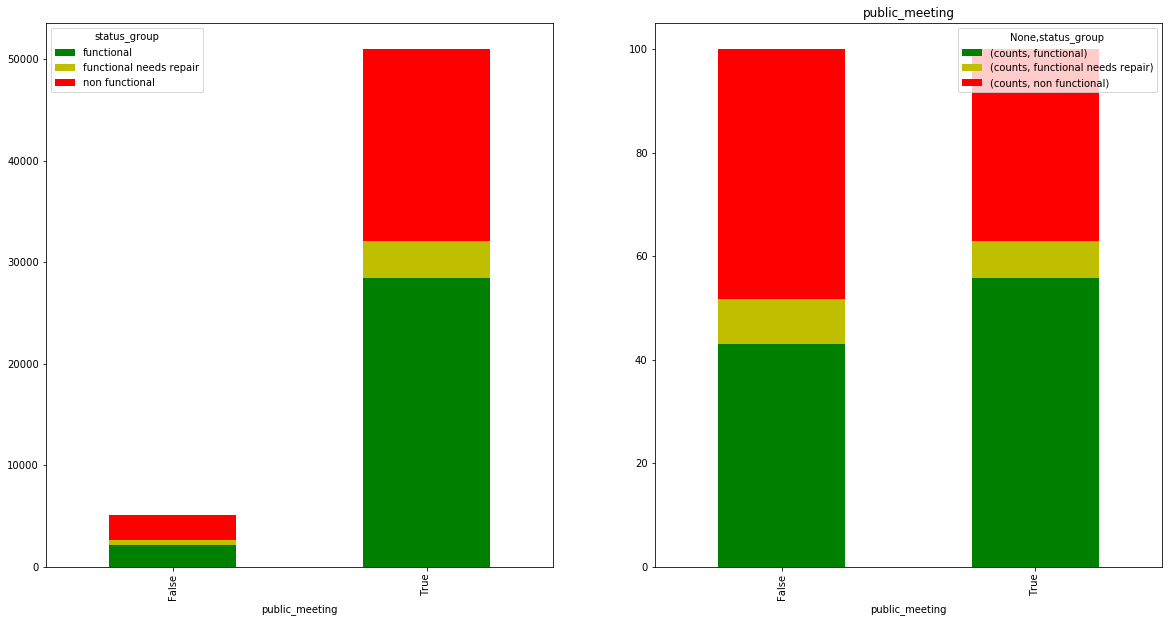

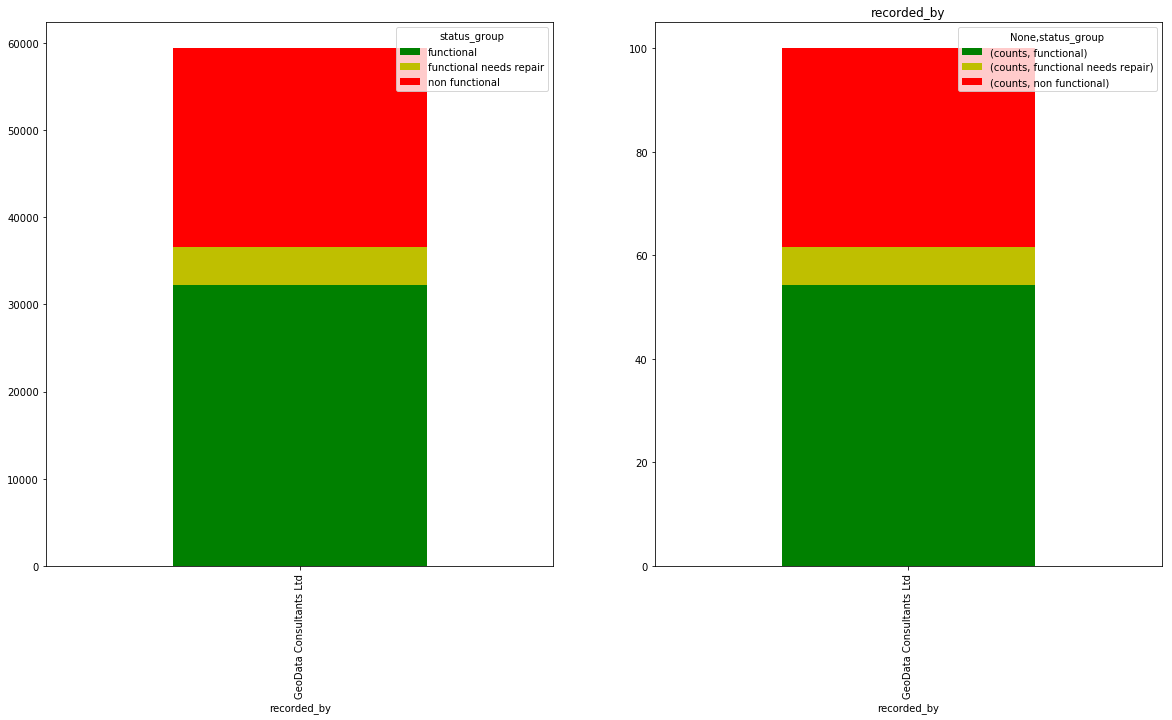

In [16]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(15,20):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

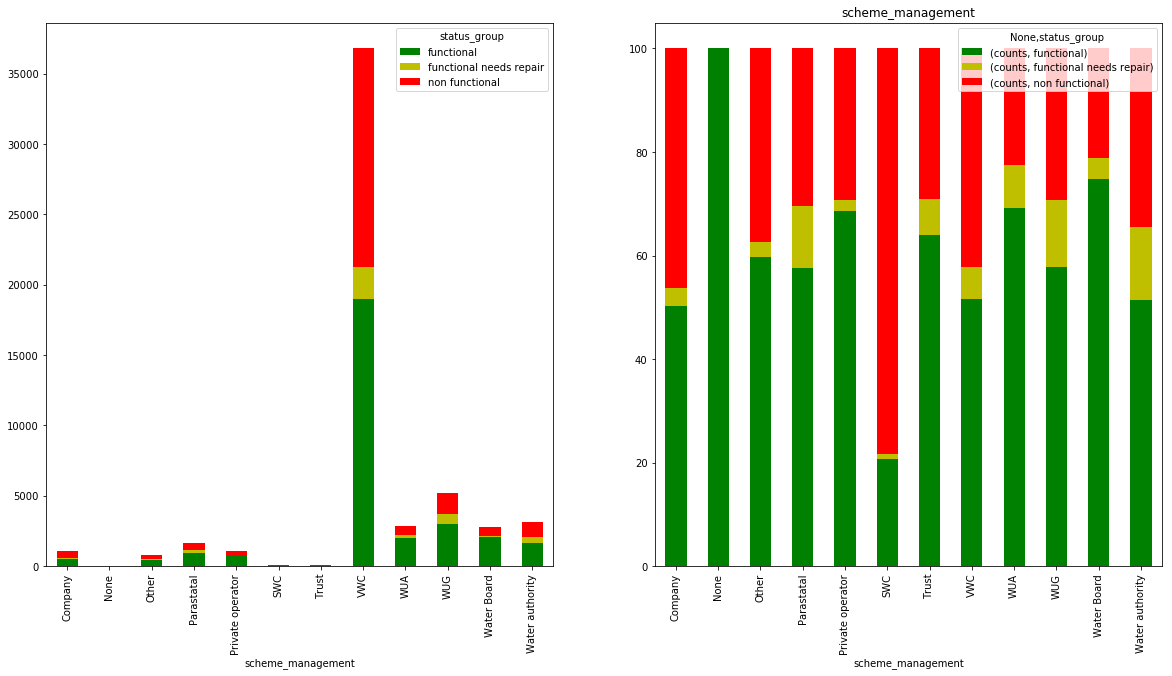

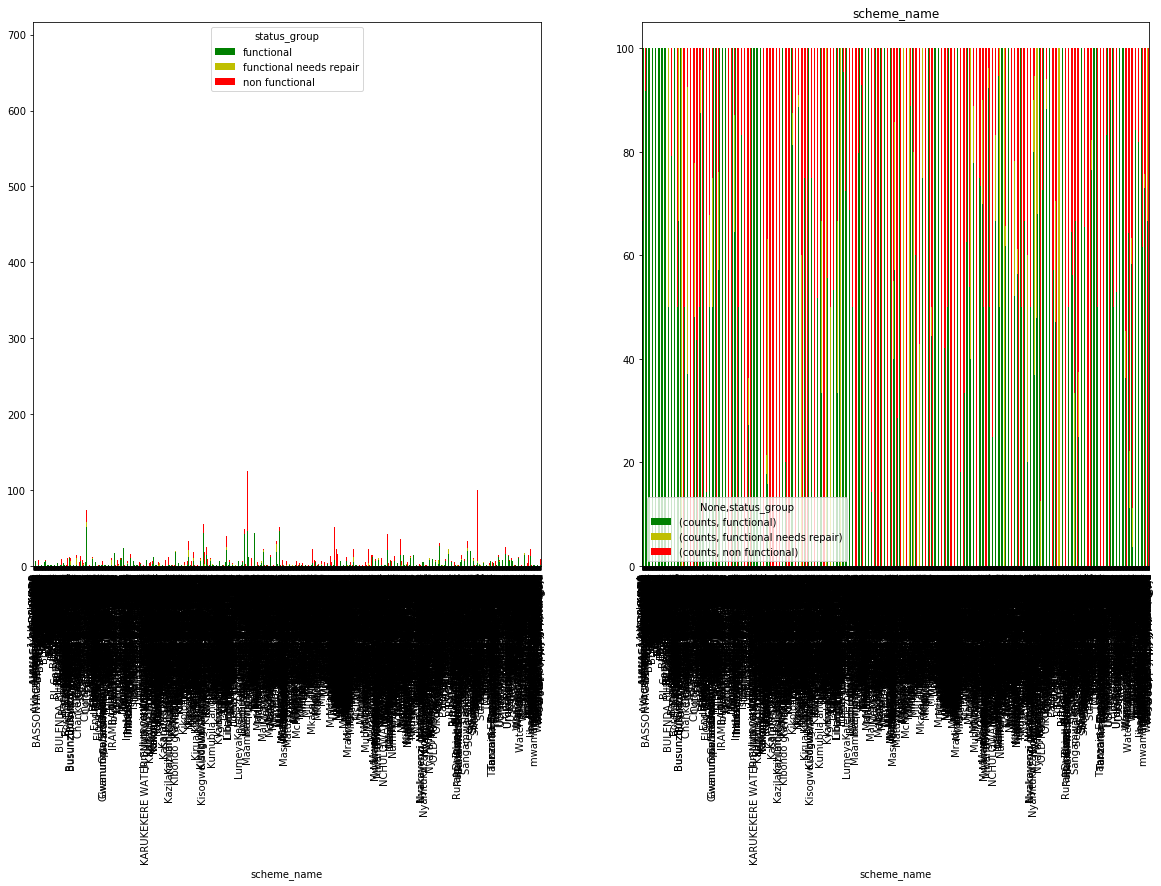

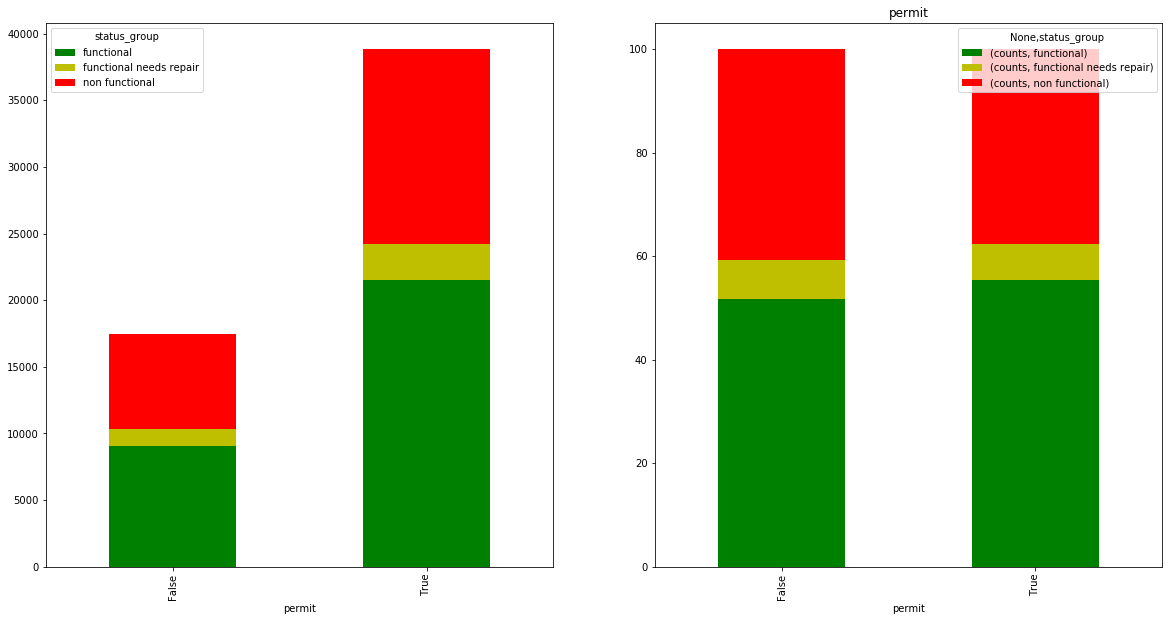

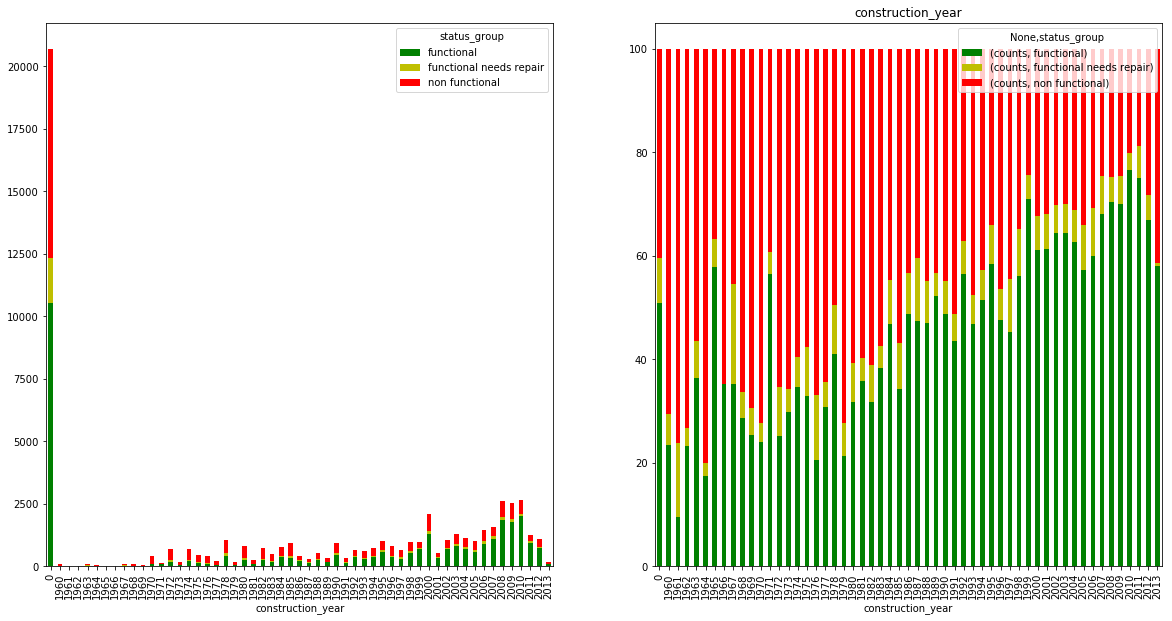

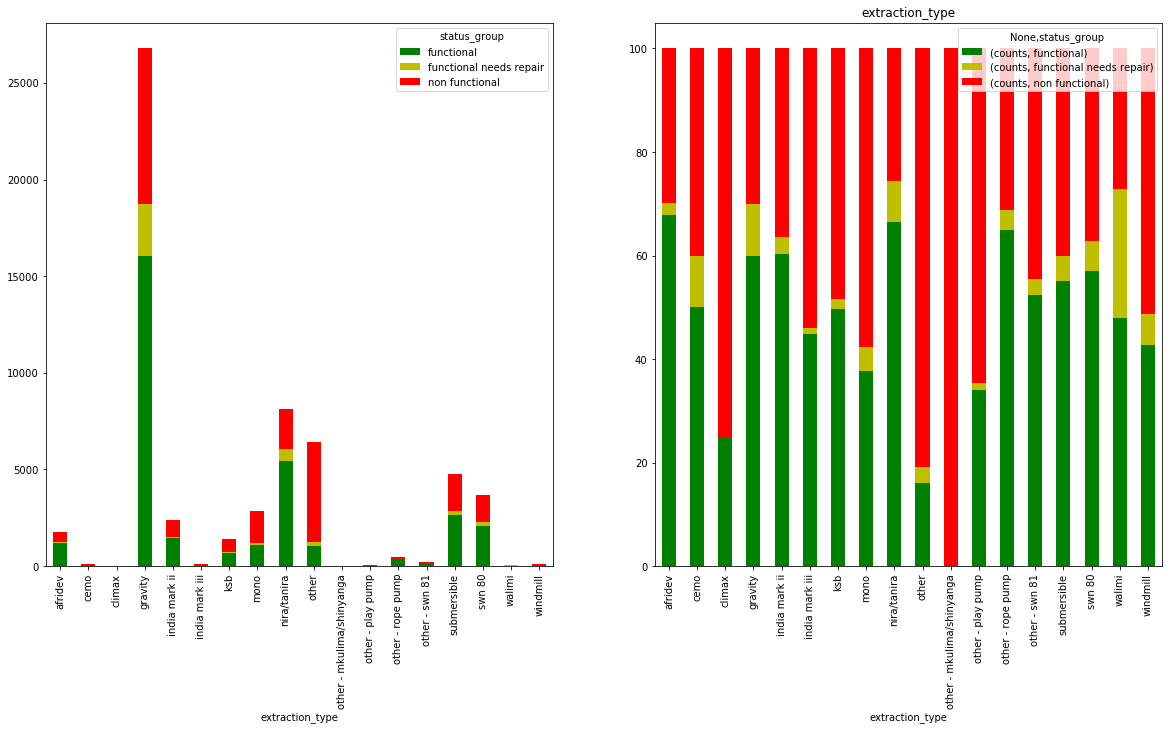

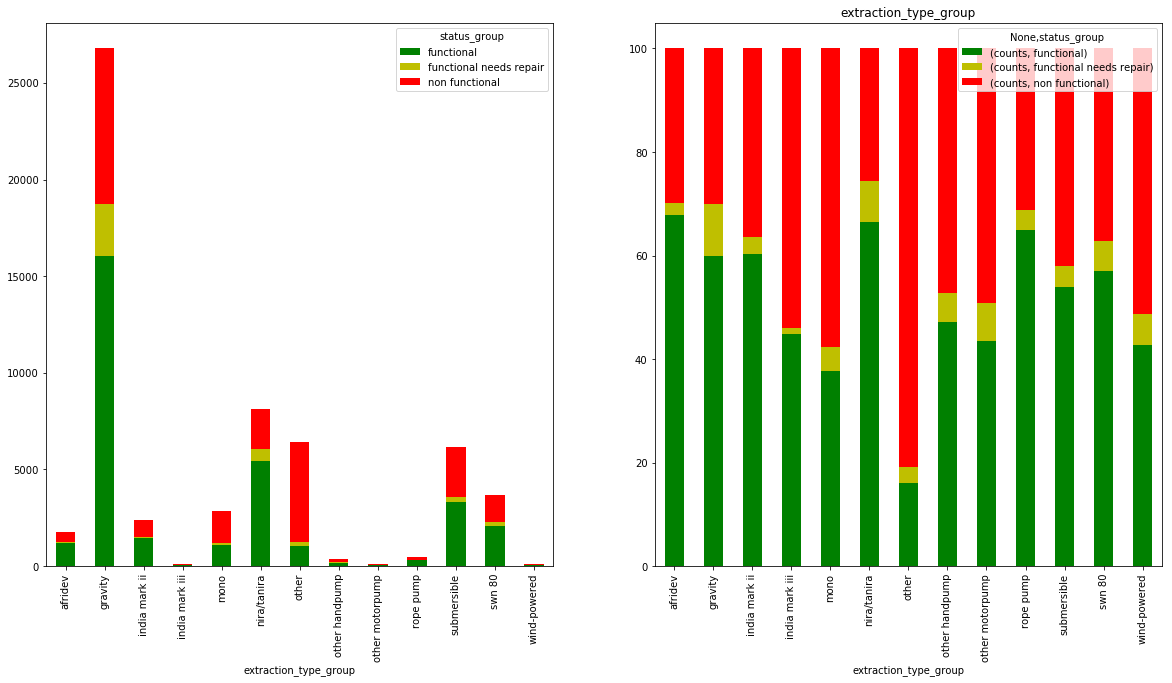

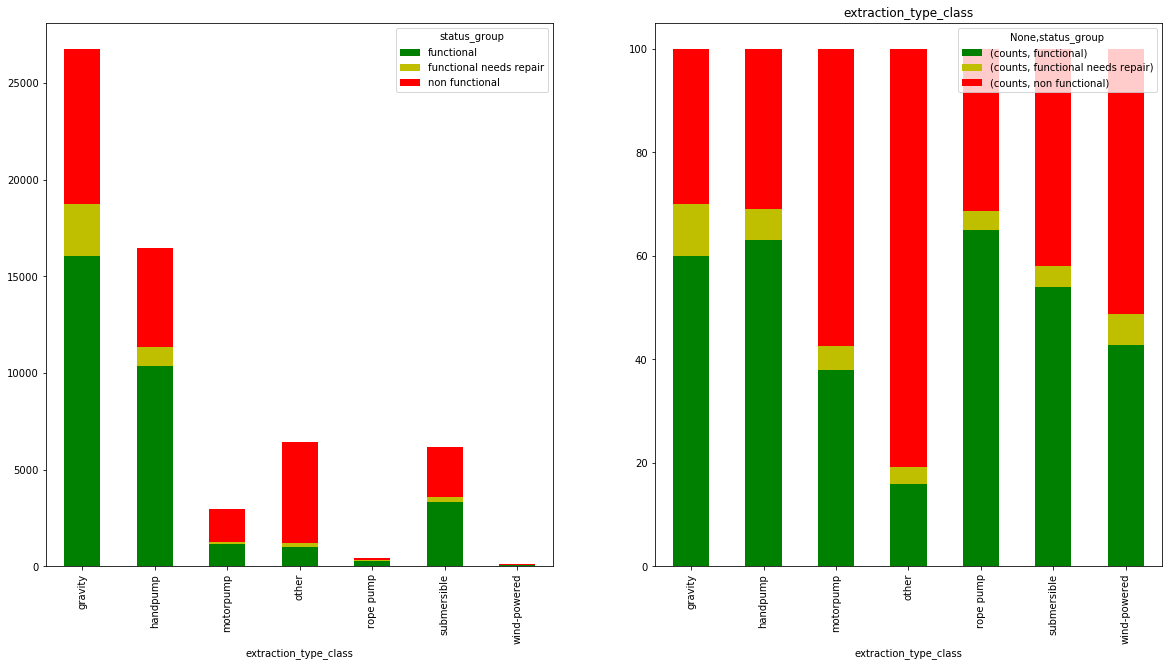

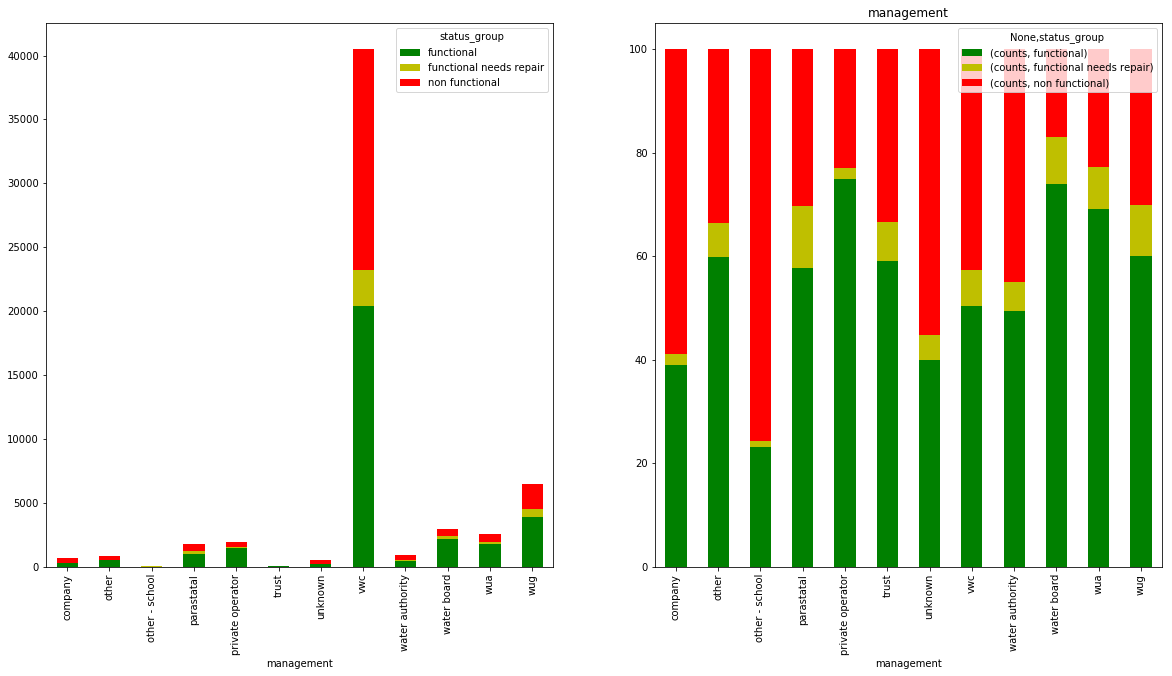

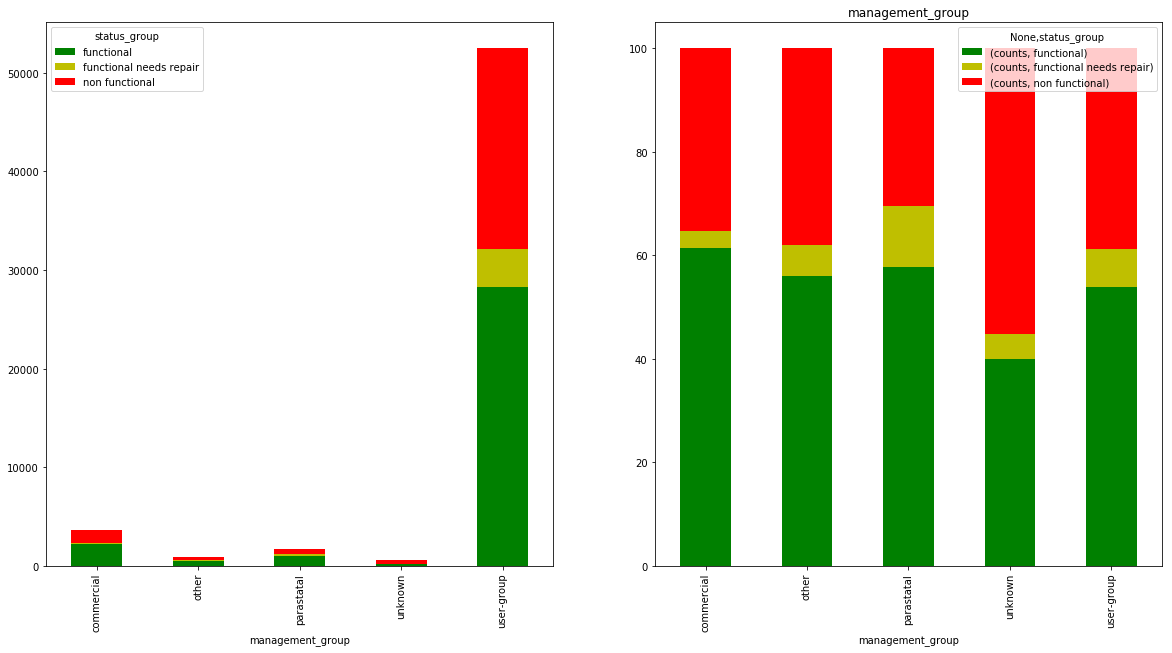

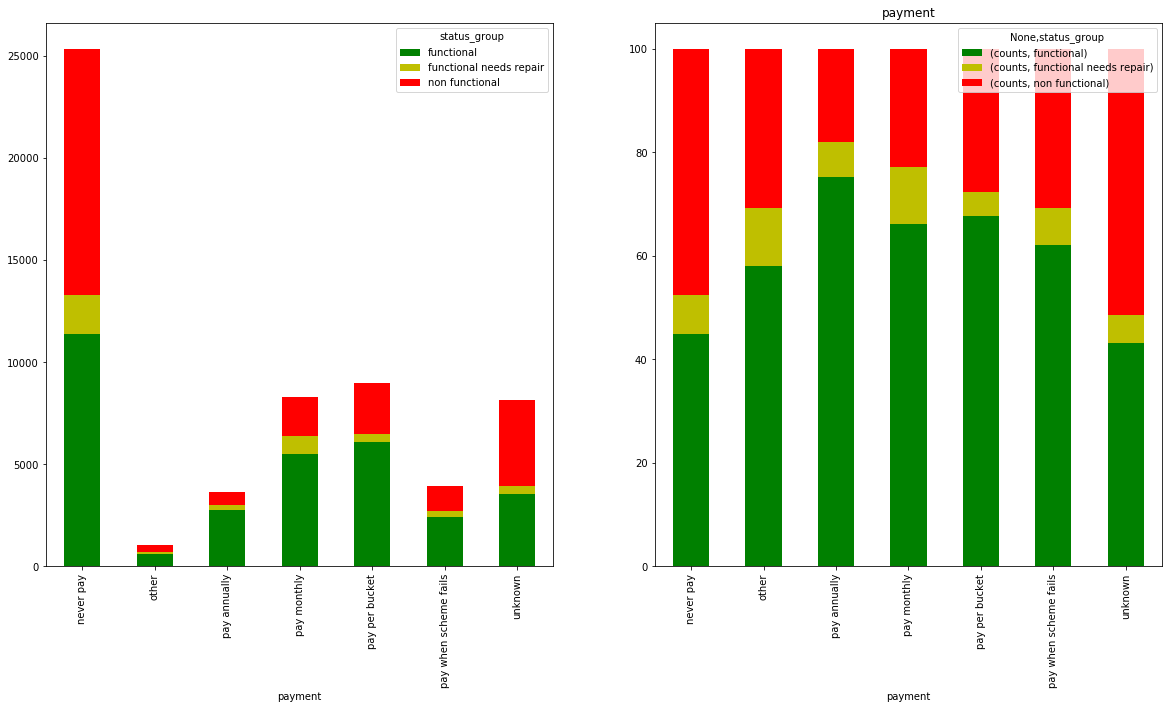

In [17]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(20,30):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

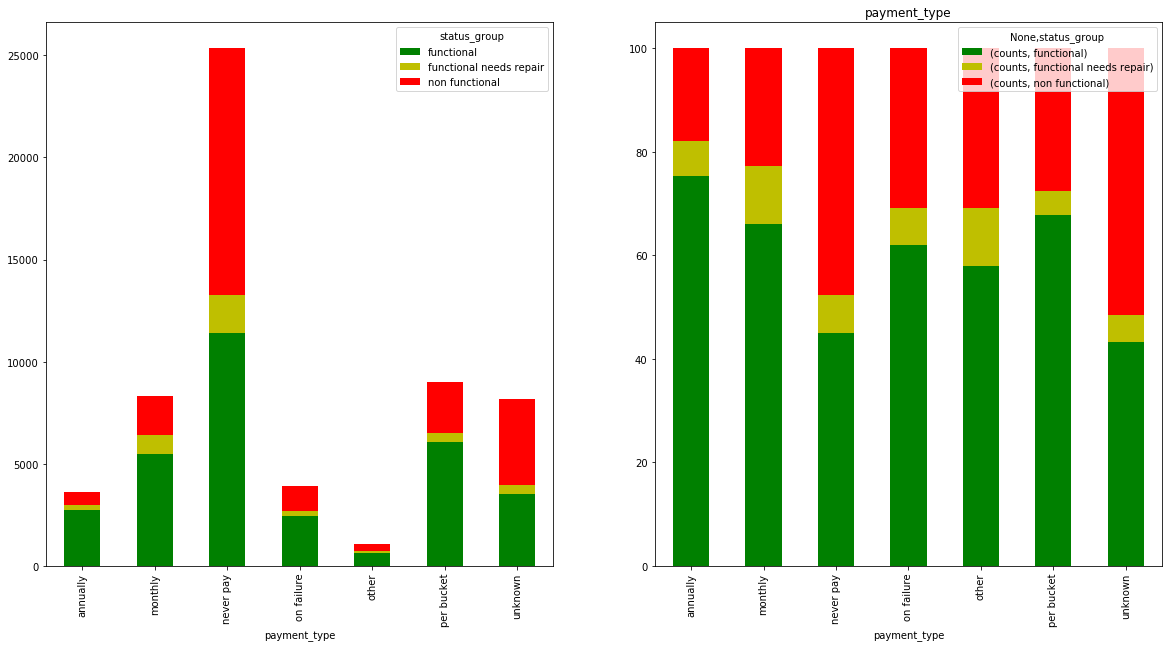

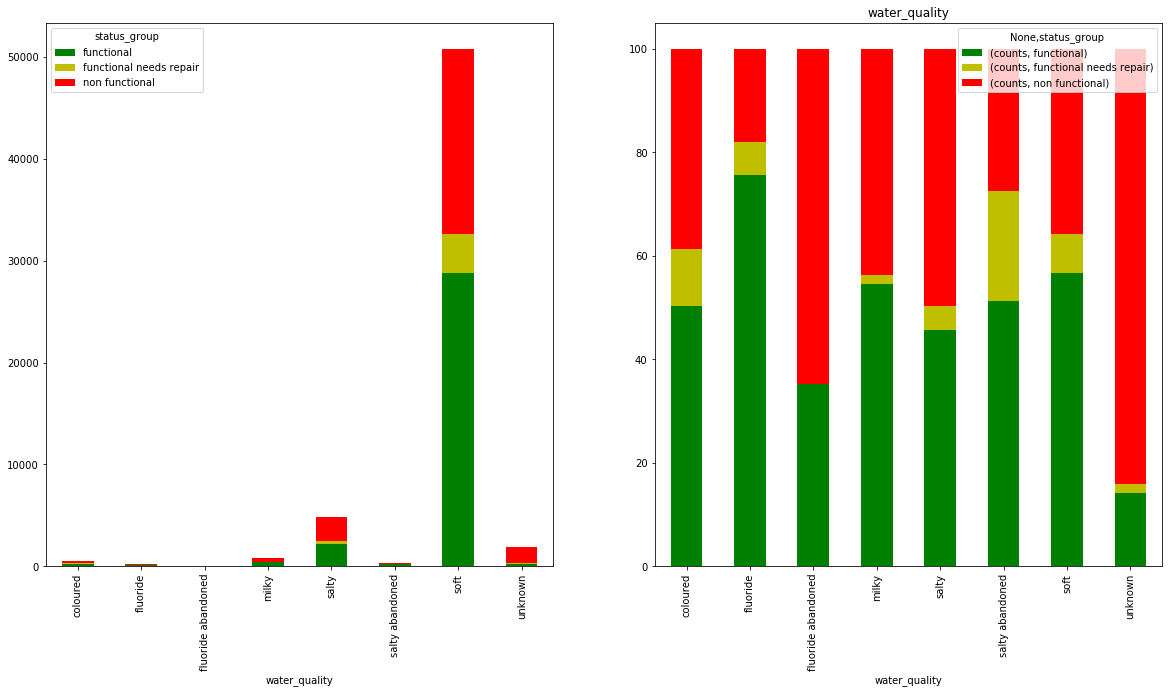

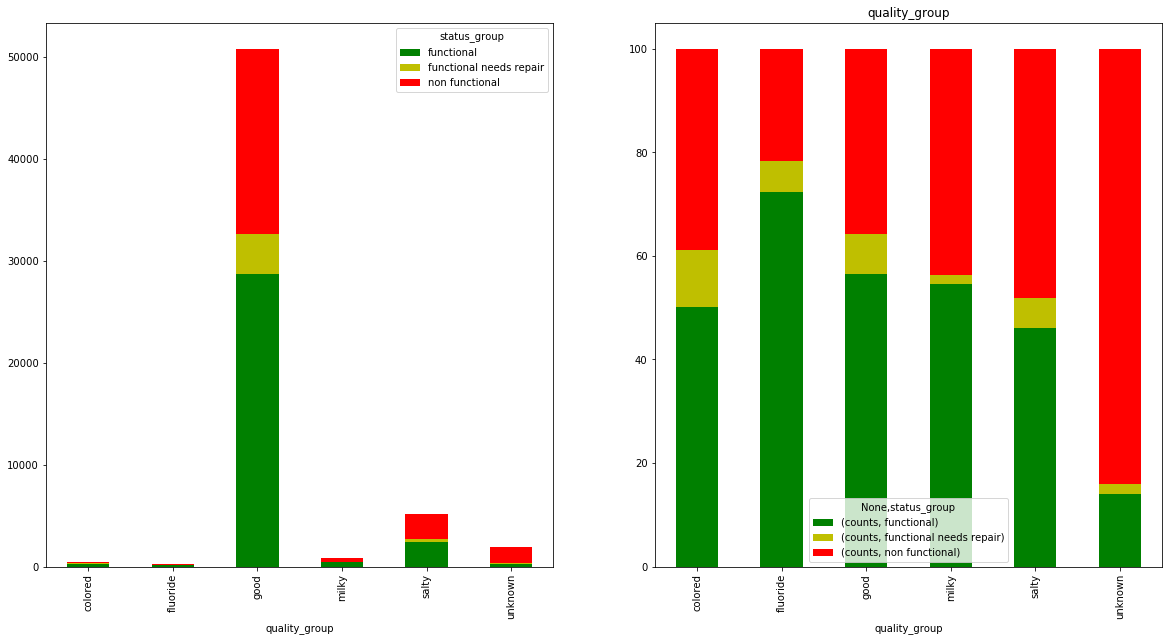

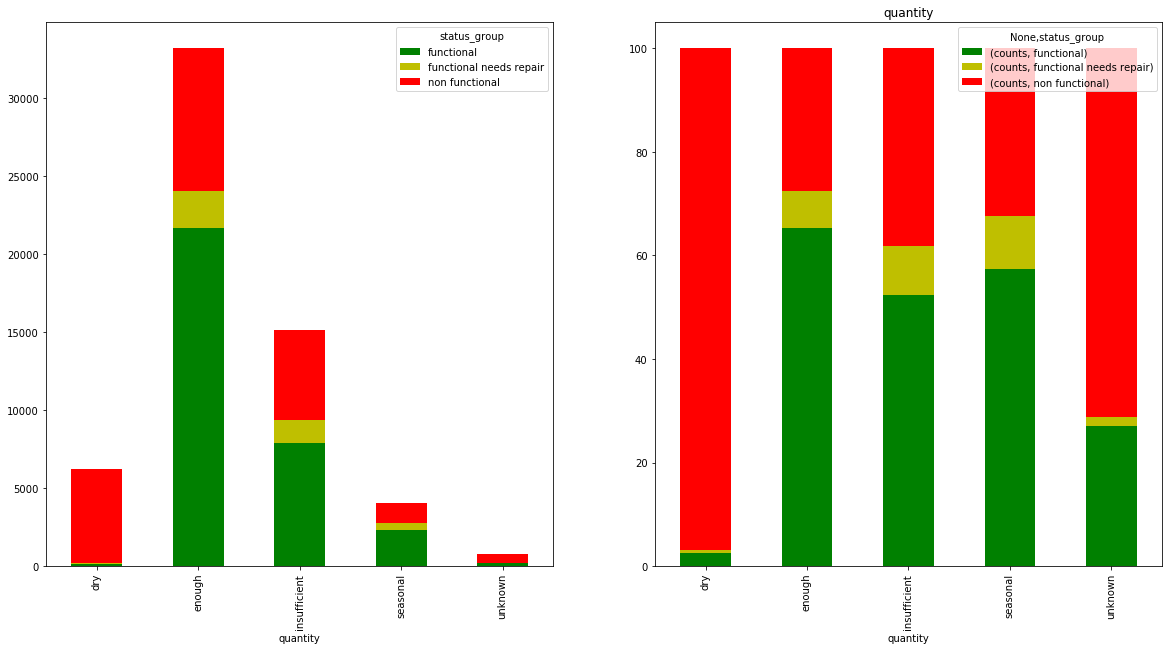

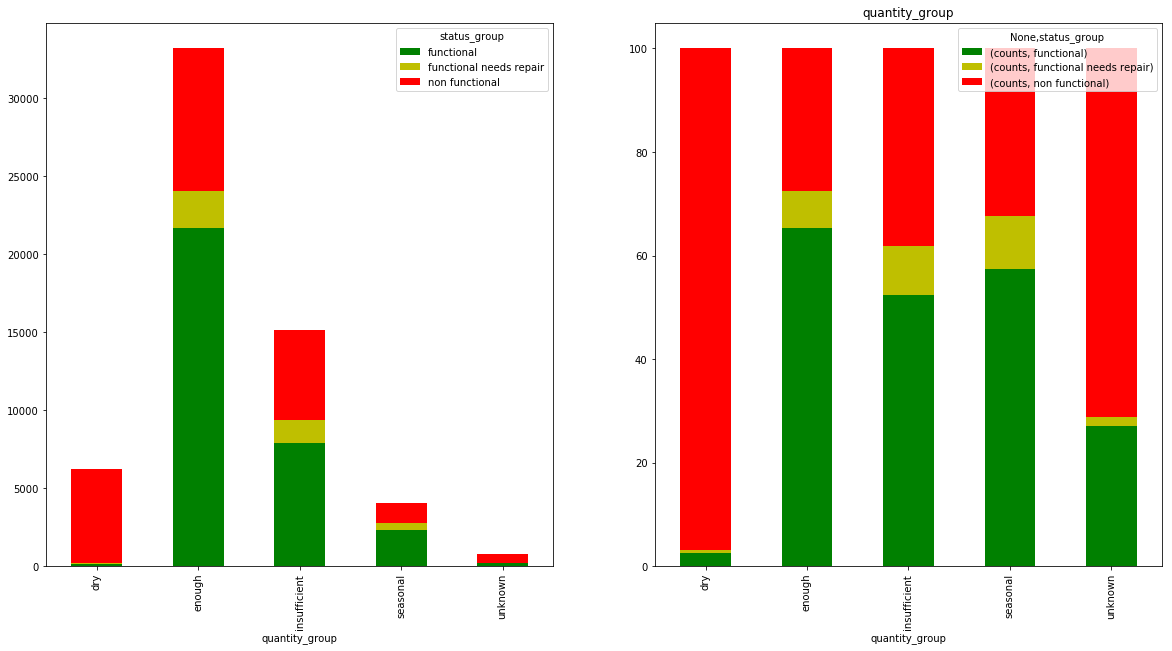

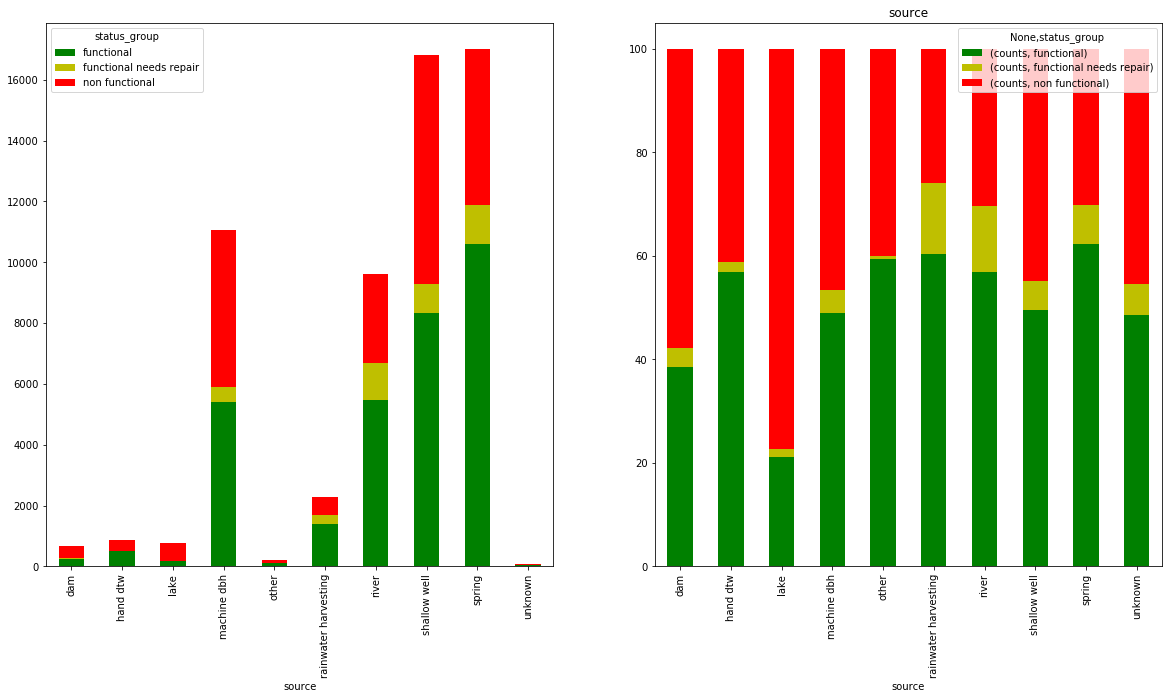

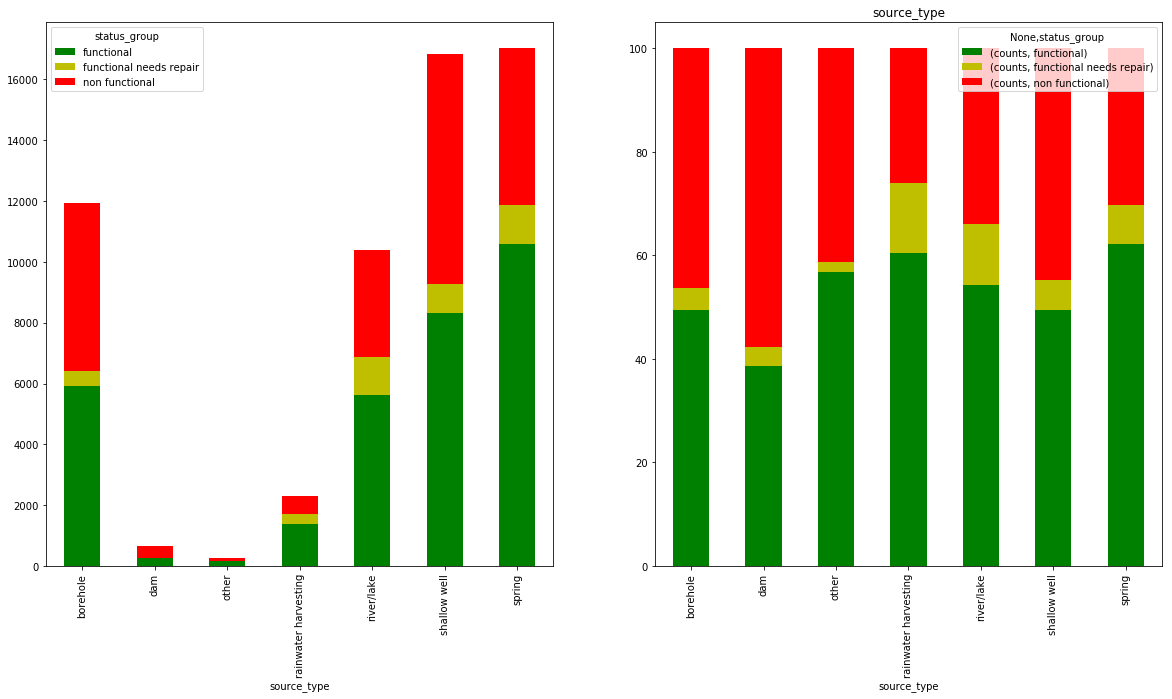

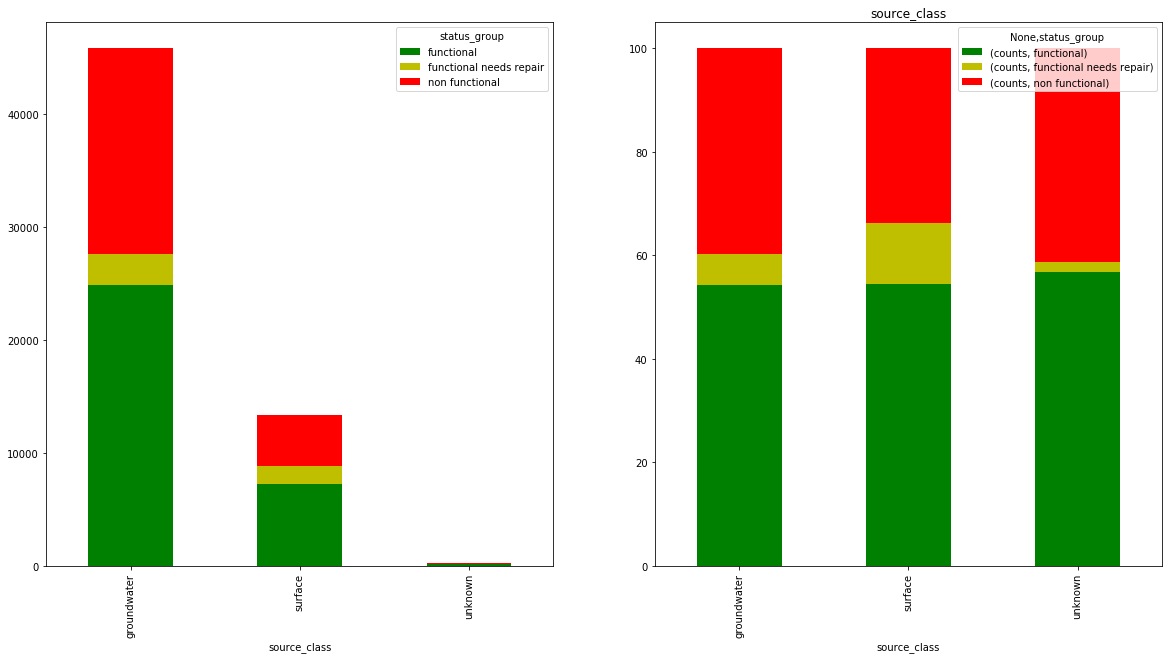

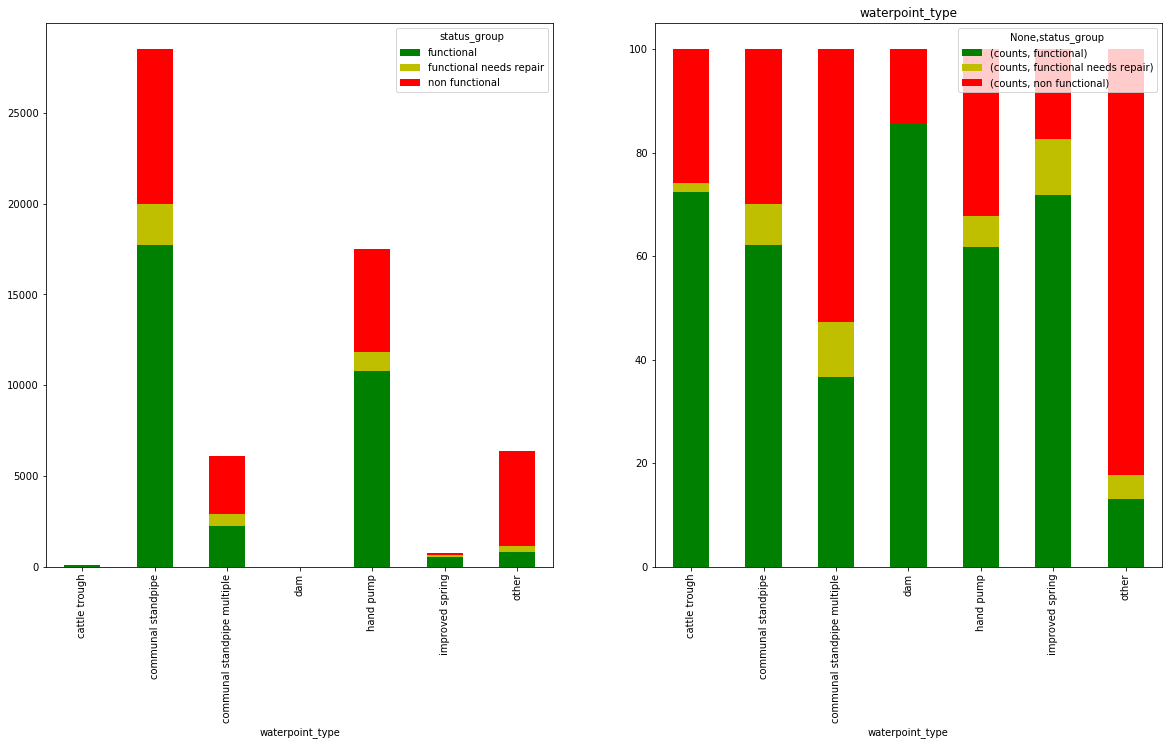

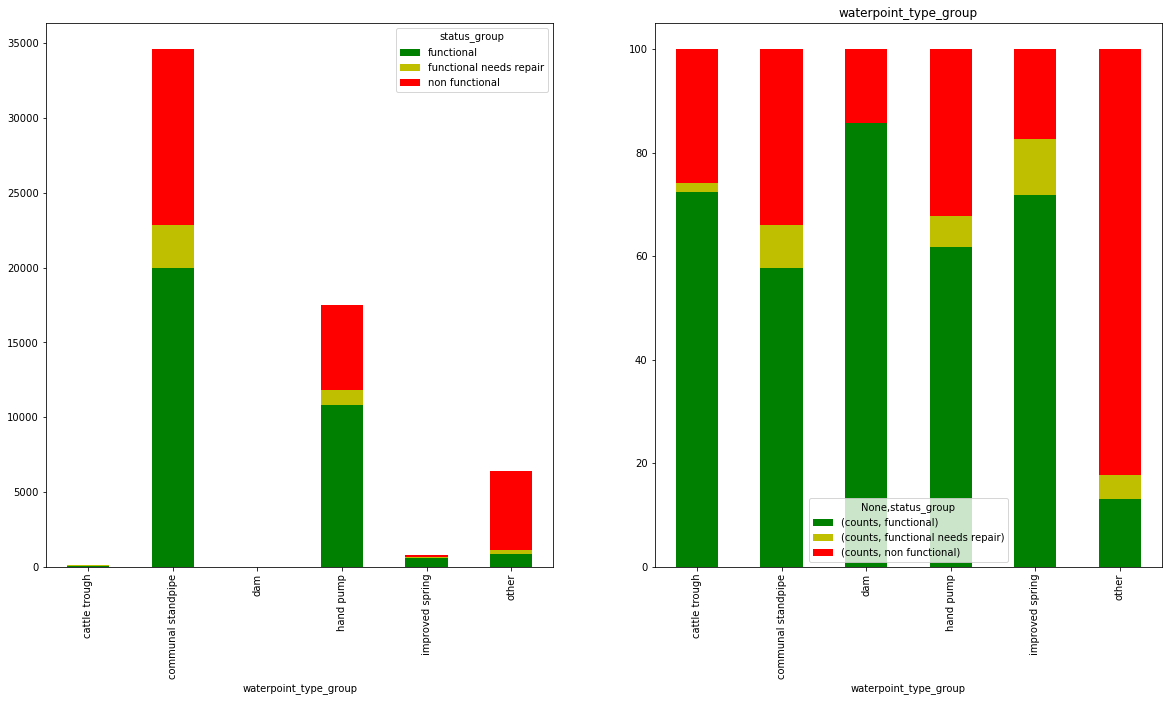

In [18]:
input = range(8,40)
colors_set = ['g', 'y', 'r']
for k in range(30,40):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

    colors_set = ['g', 'y', 'r']
    df_joined.groupby([df_joined.columns[k], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
    plt.title(df_joined.columns[k])

    month_year = df_joined.groupby([df_joined.columns[k],'status_group']).agg({'counts': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
    state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

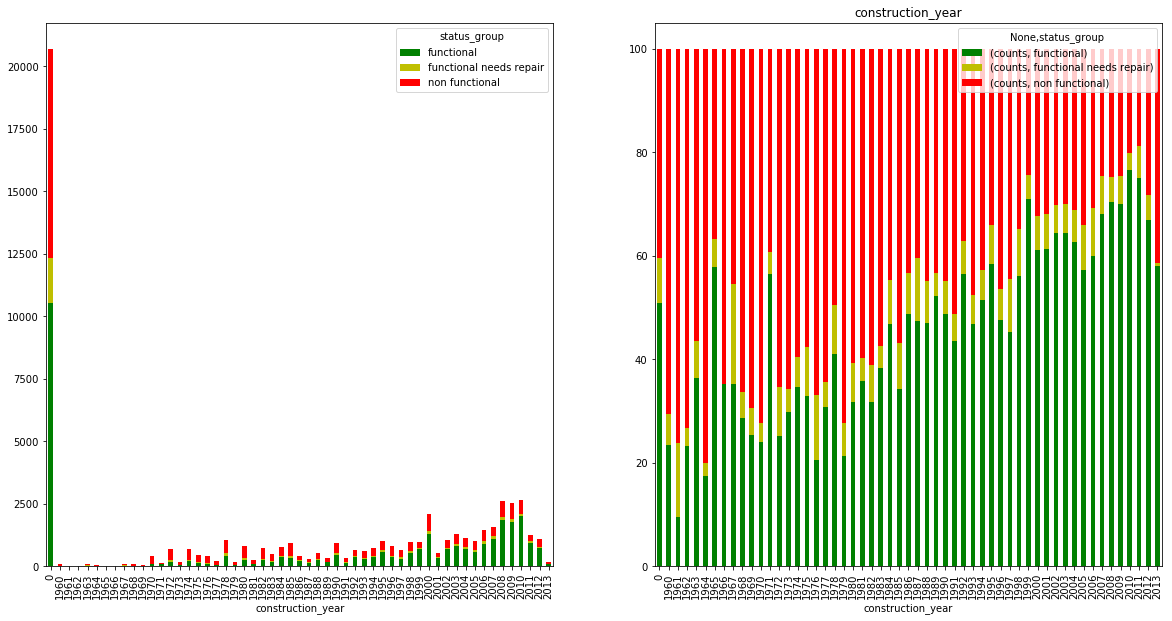

In [7]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,20))

colors_set = ['g', 'y', 'r']
df_joined.groupby([df_joined.columns[23], 'status_group']).size().unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax1,figsize=(10,10))
plt.title(df_joined.columns[23])

month_year = df_joined.groupby([df_joined.columns[23],'status_group']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = month_year.groupby(level=(0)).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts.unstack().plot(kind='bar', stacked=True, color = colors_set,ax=ax2,figsize=(20,10))

In [ ]:
colors